<div style="text-align: center; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(242, 64, 10);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
     EDA 
  </span>
</div>
<a id="import-data"></a>


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy  as sc
import math
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [10]:
df_eda = pd.read_csv(r"../data/df_eda.csv")

<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 236, 225);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Is the dataset balanced between Class=0 and Class=1?
  </span>
</div>
<a id="import-data"></a>


Total samples: 170436
Class distribution:
  Class 0: 170139 (99.8%)
  Class 1: 297 (0.2%)


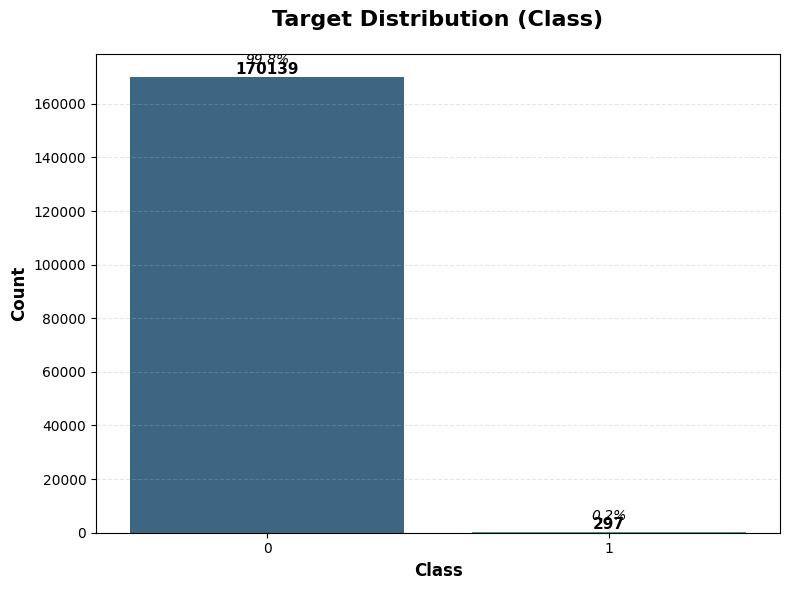

In [13]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Class', data=df_eda, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Target Distribution (Class)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

total = len(df_eda)
class_counts = df_eda['Class'].value_counts()
for i, (class_label, count) in enumerate(class_counts.items()):
    percentage = (count / total) * 100
    plt.text(i, count + max(class_counts) * 0.02, 
             f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10, style='italic')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

print(f"Total samples: {total}")
print(f"Class distribution:")
for class_label, count in class_counts.items():
    percentage = (count / total) * 100
    print(f"  Class {class_label}: {count} ({percentage:.1f}%)")

plt.show()

### Key Insight
- The dataset is **highly imbalanced**.  
- Class 0 dominates almost all samples, while Class 1 is extremely rare.  

<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 236, 225);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Does the transaction amount differ between Class=0 and Class=1?
  </span>
</div>
<a id="import-data"></a>


=== Amount Distribution Statistics ===
Class 0 (Normal transactions):
  Count: 170139
  Mean: $88.53
  Median: $22.08
  Std: $256.94
  Max: $25691.16

Class 1 (Fraudulent transactions):
  Count: 297
  Mean: $127.35
  Median: $16.48
  Std: $254.90
  Max: $1504.93


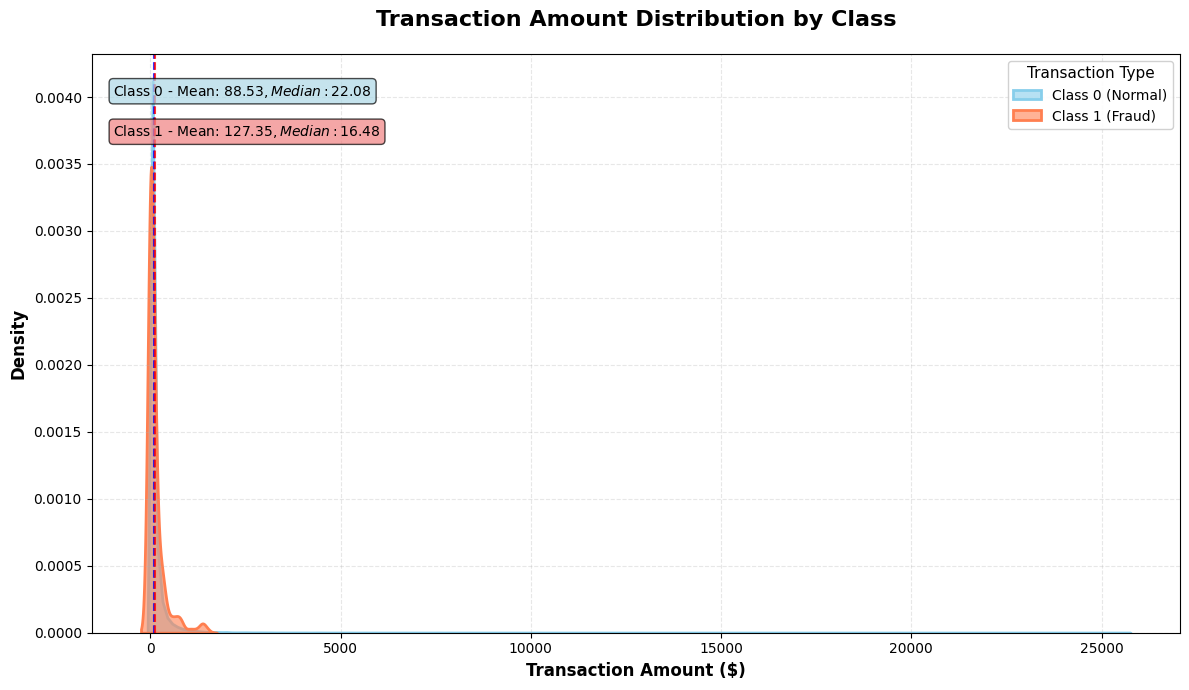

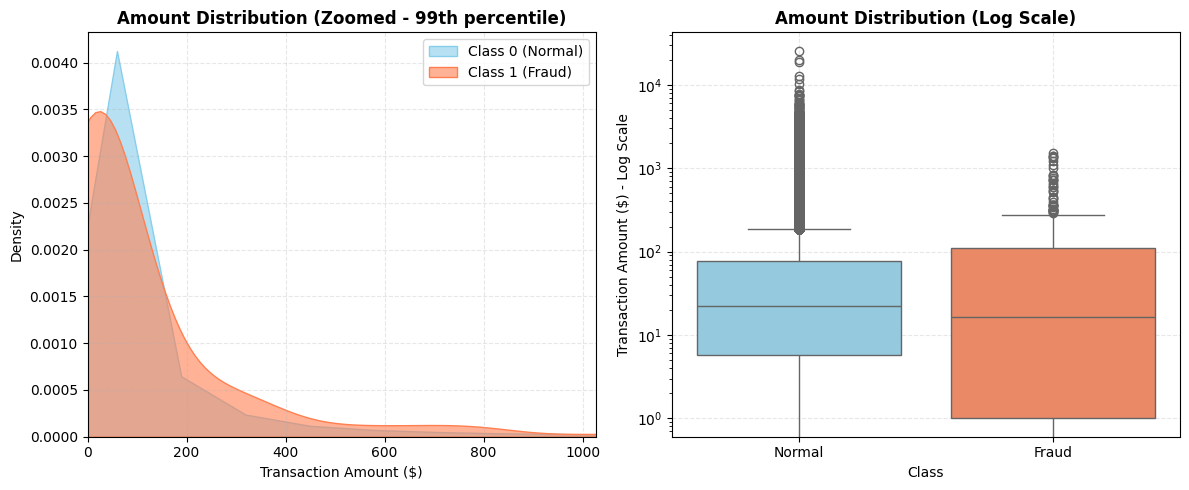

In [14]:
plt.figure(figsize=(12, 7))

sns.kdeplot(data=df_eda[df_eda['Class']==0], x='Amount', label='Class 0 (Normal)', 
            fill=True, alpha=0.6, color='skyblue', linewidth=2)
sns.kdeplot(data=df_eda[df_eda['Class']==1], x='Amount', label='Class 1 (Fraud)', 
            fill=True, alpha=0.6, color='coral', linewidth=2)

plt.title('Transaction Amount Distribution by Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Transaction Amount ($)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

plt.legend(title='Transaction Type', title_fontsize=11, fontsize=10, 
          loc='upper right', framealpha=0.9)

plt.grid(True, alpha=0.3, linestyle='--')

class_0_mean = df_eda[df_eda['Class']==0]['Amount'].mean()
class_1_mean = df_eda[df_eda['Class']==1]['Amount'].mean()
class_0_median = df_eda[df_eda['Class']==0]['Amount'].median()
class_1_median = df_eda[df_eda['Class']==1]['Amount'].median()

plt.axvline(class_0_mean, color='blue', linestyle='--', alpha=0.8, linewidth=1.5)
plt.axvline(class_1_mean, color='red', linestyle='--', alpha=0.8, linewidth=1.5)

plt.text(0.02, 0.95, f'Class 0 - Mean: ${class_0_mean:.2f}, Median: ${class_0_median:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.text(0.02, 0.88, f'Class 1 - Mean: ${class_1_mean:.2f}, Median: ${class_1_median:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()

print("=== Amount Distribution Statistics ===")
print(f"Class 0 (Normal transactions):")
print(f"  Count: {len(df_eda[df_eda['Class']==0])}")
print(f"  Mean: ${class_0_mean:.2f}")
print(f"  Median: ${class_0_median:.2f}")
print(f"  Std: ${df_eda[df_eda['Class']==0]['Amount'].std():.2f}")
print(f"  Max: ${df_eda[df_eda['Class']==0]['Amount'].max():.2f}")

print(f"\nClass 1 (Fraudulent transactions):")
print(f"  Count: {len(df_eda[df_eda['Class']==1])}")
print(f"  Mean: ${class_1_mean:.2f}")
print(f"  Median: ${class_1_median:.2f}")
print(f"  Std: ${df_eda[df_eda['Class']==1]['Amount'].std():.2f}")
print(f"  Max: ${df_eda[df_eda['Class']==1]['Amount'].max():.2f}")

plt.show()

plt.figure(figsize=(12, 5))

q99 = df_eda['Amount'].quantile(0.99)

plt.subplot(1, 2, 1)
sns.kdeplot(data=df_eda[df_eda['Class']==0], x='Amount', label='Class 0 (Normal)', 
            fill=True, alpha=0.6, color='skyblue')
sns.kdeplot(data=df_eda[df_eda['Class']==1], x='Amount', label='Class 1 (Fraud)', 
            fill=True, alpha=0.6, color='coral')
plt.xlim(0, q99)
plt.title('Amount Distribution (Zoomed - 99th percentile)', fontweight='bold')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')

plt.subplot(1, 2, 2)
df_melted = df_eda[['Amount', 'Class']].copy()
df_melted['Class'] = df_melted['Class'].map({0: 'Normal', 1: 'Fraud'})
sns.boxplot(data=df_melted, y='Amount', x='Class', palette=['skyblue', 'coral'])
plt.yscale('log')  
plt.title('Amount Distribution (Log Scale)', fontweight='bold')
plt.ylabel('Transaction Amount ($) - Log Scale')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


### Key Insights
1. **Highly skewed distributions**  
   - Both classes have medians much lower than their means, indicating **a large number of small transactions** and a few extremely large transactions (outliers).  

2. **Fraud patterns**  
   - **Average transaction for frauds ($127) is slightly higher** than normal ($88), but the **median is lower ($16)** → majority of frauds are small, with a few moderately large ones.  

3. **Extreme outliers in normal transactions**  
   - Class 0 has extremely high amounts (up to $25,691), whereas Class 1 maxes out at $1,504.  
   - This indicates that **very large transactions are almost always legitimate**.  

4. **High variability**  
   - Standard deviation is very high compared to the mean in both classes, confirming 

<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Are there specific times when fraud occurs more frequently?
  </span>
</div>
<a id="import-data"></a>


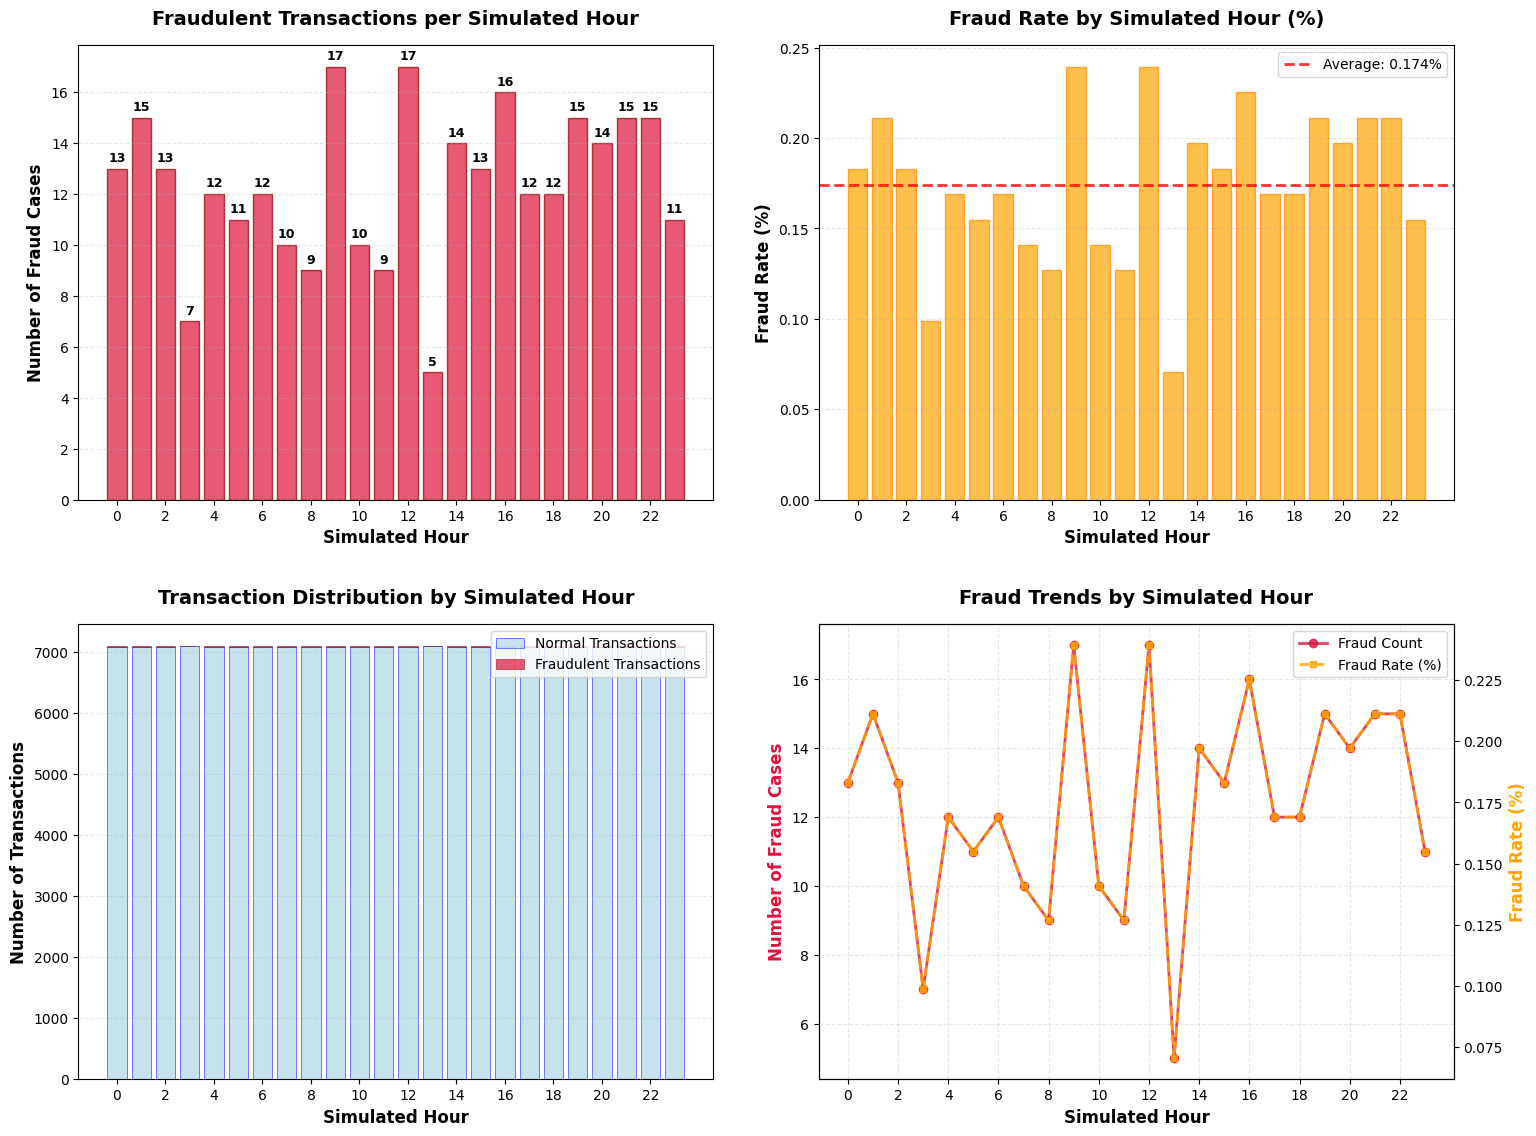

In [15]:
df_eda = df_eda.copy()
df_eda['transaction_index'] = range(len(df_eda))

df_eda['hour_simulated'] = pd.qcut(df_eda['transaction_index'], 24, labels=range(24))

fraud_counts = df_eda[df_eda['Class'] == 1].groupby('hour_simulated').size()
normal_counts = df_eda[df_eda['Class'] == 0].groupby('hour_simulated').size()
total_counts = df_eda.groupby('hour_simulated').size()

fraud_rates = (fraud_counts / total_counts * 100).fillna(0)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
bars = ax1.bar(range(24), fraud_counts, color='crimson', alpha=0.7, edgecolor='darkred', linewidth=1)
ax1.set_title('Fraudulent Transactions per Simulated Hour', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Simulated Hour', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Fraud Cases', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0: 
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(fraud_counts)*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2 = axes[0, 1]
bars2 = ax2.bar(range(24), fraud_rates, color='orange', alpha=0.7, edgecolor='darkorange', linewidth=1)
ax2.set_title('Fraud Rate by Simulated Hour (%)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Simulated Hour', fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

avg_fraud_rate = fraud_rates.mean()
ax2.axhline(y=avg_fraud_rate, color='red', linestyle='--', alpha=0.8, linewidth=2, 
           label=f'Average: {avg_fraud_rate:.3f}%')
ax2.legend()

ax3 = axes[1, 0]
width = 0.8
ax3.bar(range(24), normal_counts, width, label='Normal Transactions', 
        color='lightblue', alpha=0.7, edgecolor='blue', linewidth=0.5)
ax3.bar(range(24), fraud_counts, width, bottom=normal_counts, label='Fraudulent Transactions',
        color='crimson', alpha=0.7, edgecolor='darkred', linewidth=0.5)
ax3.set_title('Transaction Distribution by Simulated Hour', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Simulated Hour', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3, linestyle='--')

ax4 = axes[1, 1]
ax4.plot(range(24), fraud_counts, marker='o', linewidth=2, markersize=6, 
         color='crimson', label='Fraud Count', alpha=0.8)
ax4_twin = ax4.twinx()
ax4_twin.plot(range(24), fraud_rates, marker='s', linewidth=2, markersize=5, 
              color='orange', label='Fraud Rate (%)', alpha=0.8, linestyle='--')

ax4.set_title('Fraud Trends by Simulated Hour', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Simulated Hour', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Fraud Cases', fontsize=12, fontweight='bold', color='crimson')
ax4_twin.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold', color='orange')
ax4.grid(alpha=0.3, linestyle='--')

lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

for ax in axes.flat:
    ax.set_xticks(range(0, 24, 2))
    ax.set_xticklabels(range(0, 24, 2))

plt.tight_layout(pad=3.0)
plt.show()



In [16]:
print("=== Hourly Fraud Pattern Analysis ===")
print(f"Total transactions: {len(df_eda):,}")
print(f"Total fraudulent transactions: {len(df_eda[df_eda['Class']==1]):,}")
print(f"Overall fraud rate: {len(df_eda[df_eda['Class']==1])/len(df_eda)*100:.4f}%")
print(f"\nAverage fraud rate per hour: {fraud_rates.mean():.4f}%")
print(f"Standard deviation of hourly fraud rates: {fraud_rates.std():.4f}%")

print(f"\nTop 5 hours with highest fraud counts:")
top_fraud_hours = fraud_counts.nlargest(5)
for hour, count in top_fraud_hours.items():
    rate = fraud_rates[hour]
    print(f"  Hour {hour}: {count} frauds ({rate:.3f}% rate)")

print(f"\nTop 5 hours with highest fraud rates:")
top_rate_hours = fraud_rates.nlargest(5)
for hour, rate in top_rate_hours.items():
    count = fraud_counts[hour] if hour in fraud_counts.index else 0
    print(f"  Hour {hour}: {rate:.3f}% rate ({count} frauds)")

print(f"\nHours with no fraud detected:")
no_fraud_hours = [h for h in range(24) if h not in fraud_counts.index or fraud_counts[h] == 0]
if no_fraud_hours:
    print(f"  Hours: {no_fraud_hours}")
else:
    print("  None - fraud detected in all hours")

fraud_count_variance = fraud_counts.var()
fraud_rate_variance = fraud_rates.var()
print(f"\nVariance in fraud counts across hours: {fraud_count_variance:.2f}")
print(f"Variance in fraud rates across hours: {fraud_rate_variance:.6f}")

peak_threshold = fraud_rates.mean() + fraud_rates.std()
peak_hours = fraud_rates[fraud_rates >= peak_threshold].index.tolist()
if peak_hours:
    print(f"\nPeak fraud hours (above mean + 1 std): {peak_hours}")
else:
    print(f"\nNo significant peak hours identified (threshold: {peak_threshold:.4f}%)")

=== Hourly Fraud Pattern Analysis ===
Total transactions: 170,436
Total fraudulent transactions: 297
Overall fraud rate: 0.1743%

Average fraud rate per hour: 0.1743%
Standard deviation of hourly fraud rates: 0.0427%

Top 5 hours with highest fraud counts:
  Hour 9: 17 frauds (0.239% rate)
  Hour 12: 17 frauds (0.239% rate)
  Hour 16: 16 frauds (0.225% rate)
  Hour 1: 15 frauds (0.211% rate)
  Hour 19: 15 frauds (0.211% rate)

Top 5 hours with highest fraud rates:
  Hour 9: 0.239% rate (17 frauds)
  Hour 12: 0.239% rate (17 frauds)
  Hour 16: 0.225% rate (16 frauds)
  Hour 1: 0.211% rate (15 frauds)
  Hour 22: 0.211% rate (15 frauds)

Hours with no fraud detected:
  None - fraud detected in all hours

Variance in fraud counts across hours: 9.20
Variance in fraud rates across hours: 0.001825

Peak fraud hours (above mean + 1 std): [9, 12, 16]


### Key Insights
- Fraud happens **every hour**, no hour is completely safe.  
- **Peak hours for fraud:** 9 AM, 12 PM, 4 PM.  
- Fraud rates are **very low overall** but slightly higher during these peak hours.  


<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
  Do the values flagged by Isolation Forest correlate with fraud?
  </span>
</div>
<a id="import-data"></a>


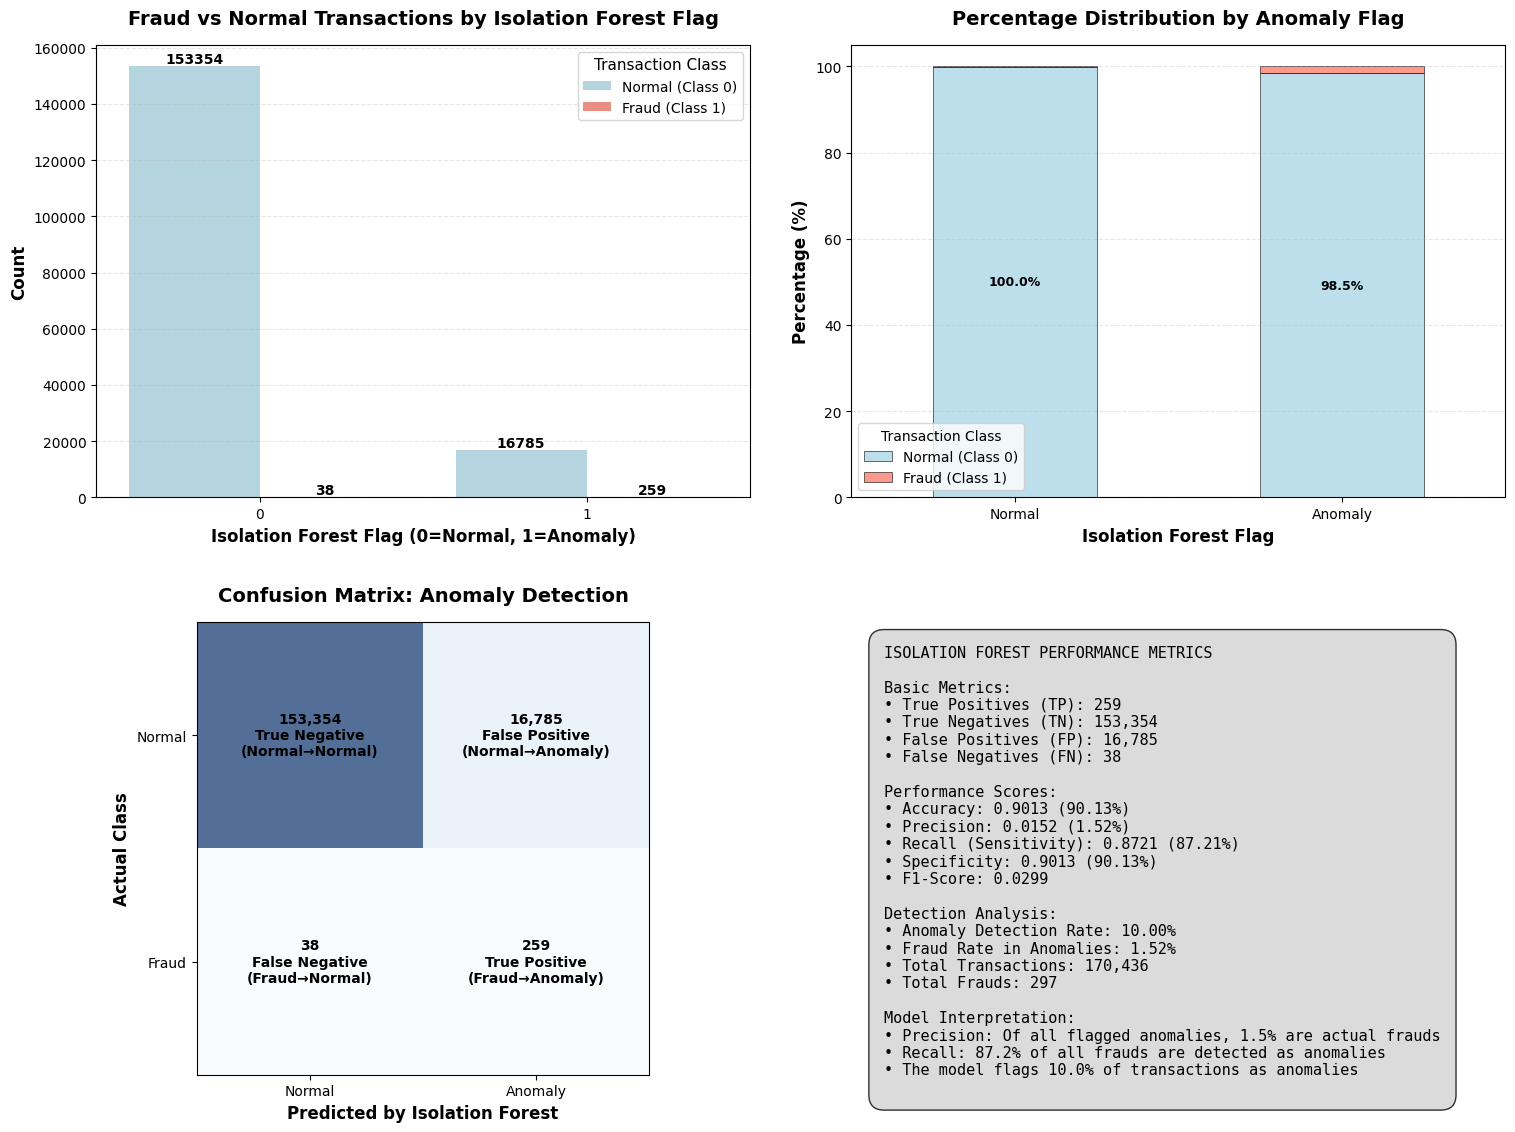

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
sns.countplot(x='is_anomaly', hue='Class', data=df_eda, palette=['lightblue', 'salmon'], ax=ax1)

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fontsize=10, fontweight='bold')

ax1.set_title('Fraud vs Normal Transactions by Isolation Forest Flag', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Isolation Forest Flag (0=Normal, 1=Anomaly)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.legend(title='Transaction Class', labels=['Normal (Class 0)', 'Fraud (Class 1)'], 
           title_fontsize=11, fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# 2. Percentage-based stacked bar chart
ax2 = axes[0, 1]
crosstab = pd.crosstab(df_eda['is_anomaly'], df_eda['Class'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, ax=ax2, color=['lightblue', 'salmon'], 
              alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Percentage Distribution by Anomaly Flag', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Isolation Forest Flag', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.legend(title='Transaction Class', labels=['Normal (Class 0)', 'Fraud (Class 1)'])
ax2.set_xticklabels(['Normal', 'Anomaly'], rotation=0)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add percentage labels
for i, (idx, row) in enumerate(crosstab.iterrows()):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 3:  # Only show label if percentage > 3%
            ax2.text(i, cumulative + val/2, f'{val:.1f}%', 
                    ha='center', va='center', fontweight='bold', fontsize=9)
        cumulative += val

# 3. Detection performance metrics visualization
ax3 = axes[1, 0]

# Calculate confusion matrix-style metrics
tn = len(df_eda[(df_eda['is_anomaly'] == 0) & (df_eda['Class'] == 0)])  # True Negative
fp = len(df_eda[(df_eda['is_anomaly'] == 1) & (df_eda['Class'] == 0)])  # False Positive
fn = len(df_eda[(df_eda['is_anomaly'] == 0) & (df_eda['Class'] == 1)])  # False Negative
tp = len(df_eda[(df_eda['is_anomaly'] == 1) & (df_eda['Class'] == 1)])  # True Positive

# Create confusion matrix heatmap
confusion_matrix = [[tn, fp], [fn, tp]]
labels = [['True Negative\n(Normal→Normal)', 'False Positive\n(Normal→Anomaly)'],
          ['False Negative\n(Fraud→Normal)', 'True Positive\n(Fraud→Anomaly)']]

im = ax3.imshow(confusion_matrix, cmap='Blues', alpha=0.7)
ax3.set_title('Confusion Matrix: Anomaly Detection', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Predicted by Isolation Forest', fontsize=12, fontweight='bold')
ax3.set_ylabel('Actual Class', fontsize=12, fontweight='bold')
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_xticklabels(['Normal', 'Anomaly'])
ax3.set_yticklabels(['Normal', 'Fraud'])

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax3.text(j, i, f'{confusion_matrix[i][j]:,}\n{labels[i][j]}',
                       ha="center", va="center", fontweight='bold', fontsize=10)

# 4. Performance metrics summary
ax4 = axes[1, 1]
ax4.axis('off')  # Turn off axis for text display

# Calculate metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate detection rates
anomaly_detection_rate = len(df_eda[df_eda['is_anomaly'] == 1]) / len(df_eda) * 100
fraud_in_anomalies = tp / len(df_eda[df_eda['is_anomaly'] == 1]) * 100 if len(df_eda[df_eda['is_anomaly'] == 1]) > 0 else 0

# Create performance summary text
performance_text = f"""ISOLATION FOREST PERFORMANCE METRICS

Basic Metrics:
• True Positives (TP): {tp:,}
• True Negatives (TN): {tn:,}
• False Positives (FP): {fp:,}
• False Negatives (FN): {fn:,}

Performance Scores:
• Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)
• Precision: {precision:.4f} ({precision*100:.2f}%)
• Recall (Sensitivity): {recall:.4f} ({recall*100:.2f}%)
• Specificity: {specificity:.4f} ({specificity*100:.2f}%)
• F1-Score: {f1_score:.4f}

Detection Analysis:
• Anomaly Detection Rate: {anomaly_detection_rate:.2f}%
• Fraud Rate in Anomalies: {fraud_in_anomalies:.2f}%
• Total Transactions: {len(df_eda):,}
• Total Frauds: {len(df_eda[df_eda['Class']==1]):,}

Model Interpretation:
• Precision: Of all flagged anomalies, {precision*100:.1f}% are actual frauds
• Recall: {recall*100:.1f}% of all frauds are detected as anomalies
• The model flags {anomaly_detection_rate:.1f}% of transactions as anomalies
"""

ax4.text(0.05, 0.95, performance_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()



In [18]:
# Print detailed analysis
print("=== ISOLATION FOREST ANOMALY DETECTION ANALYSIS ===")
print(f"\nDataset Overview:")
print(f"Total transactions: {len(df_eda):,}")
print(f"Normal transactions: {len(df_eda[df_eda['Class']==0]):,}")
print(f"Fraudulent transactions: {len(df_eda[df_eda['Class']==1]):,}")
print(f"Overall fraud rate: {len(df_eda[df_eda['Class']==1])/len(df_eda)*100:.4f}%")

print(f"\nAnomaly Detection Results:")
print(f"Transactions flagged as anomalies: {len(df_eda[df_eda['is_anomaly']==1]):,} ({anomaly_detection_rate:.2f}%)")
print(f"Transactions flagged as normal: {len(df_eda[df_eda['is_anomaly']==0]):,} ({100-anomaly_detection_rate:.2f}%)")

print(f"\nDetailed Breakdown:")
print(f"True Positives (Fraud correctly identified): {tp:,}")
print(f"True Negatives (Normal correctly identified): {tn:,}")
print(f"False Positives (Normal incorrectly flagged): {fp:,}")
print(f"False Negatives (Fraud missed): {fn:,}")

print(f"\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1_score:.4f}")
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")

print(f"\nModel Effectiveness:")
if precision > 0.1:
    print(f"✓ Good precision: {precision*100:.1f}% of anomalies are actual frauds")
else:
    print(f"⚠ Low precision: Only {precision*100:.1f}% of anomalies are actual frauds")

if recall > 0.5:
    print(f"✓ Good recall: Detects {recall*100:.1f}% of all frauds")
else:
    print(f"⚠ Low recall: Only detects {recall*100:.1f}% of all frauds")




=== ISOLATION FOREST ANOMALY DETECTION ANALYSIS ===

Dataset Overview:
Total transactions: 170,436
Normal transactions: 170,139
Fraudulent transactions: 297
Overall fraud rate: 0.1743%

Anomaly Detection Results:
Transactions flagged as anomalies: 17,044 (10.00%)
Transactions flagged as normal: 153,392 (90.00%)

Detailed Breakdown:
True Positives (Fraud correctly identified): 259
True Negatives (Normal correctly identified): 153,354
False Positives (Normal incorrectly flagged): 16,785
False Negatives (Fraud missed): 38

Performance Metrics:
Accuracy: 0.9013 (90.13%)
Precision: 0.0152 (1.52%)
Recall: 0.8721 (87.21%)
F1-Score: 0.0299
Specificity: 0.9013 (90.13%)

Model Effectiveness:
⚠ Low precision: Only 1.5% of anomalies are actual frauds
✓ Good recall: Detects 87.2% of all frauds


### Key Insights
- **Low precision:** Only ~1.5% of flagged anomalies are actual fraud → many false alarms.  
- **High recall:** Detects ~87% of all frauds → effective at capturing most fraudulent transactions.  

<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Are certain clusters more associated with fraud?
  </span>
</div>
<a id="import-data"></a>


In [19]:
df_eda.cluster_id.value_counts()


cluster_id
7    41609
5    36178
4    34833
3    24784
1    18841
0    11825
2     2226
6      140
Name: count, dtype: int64

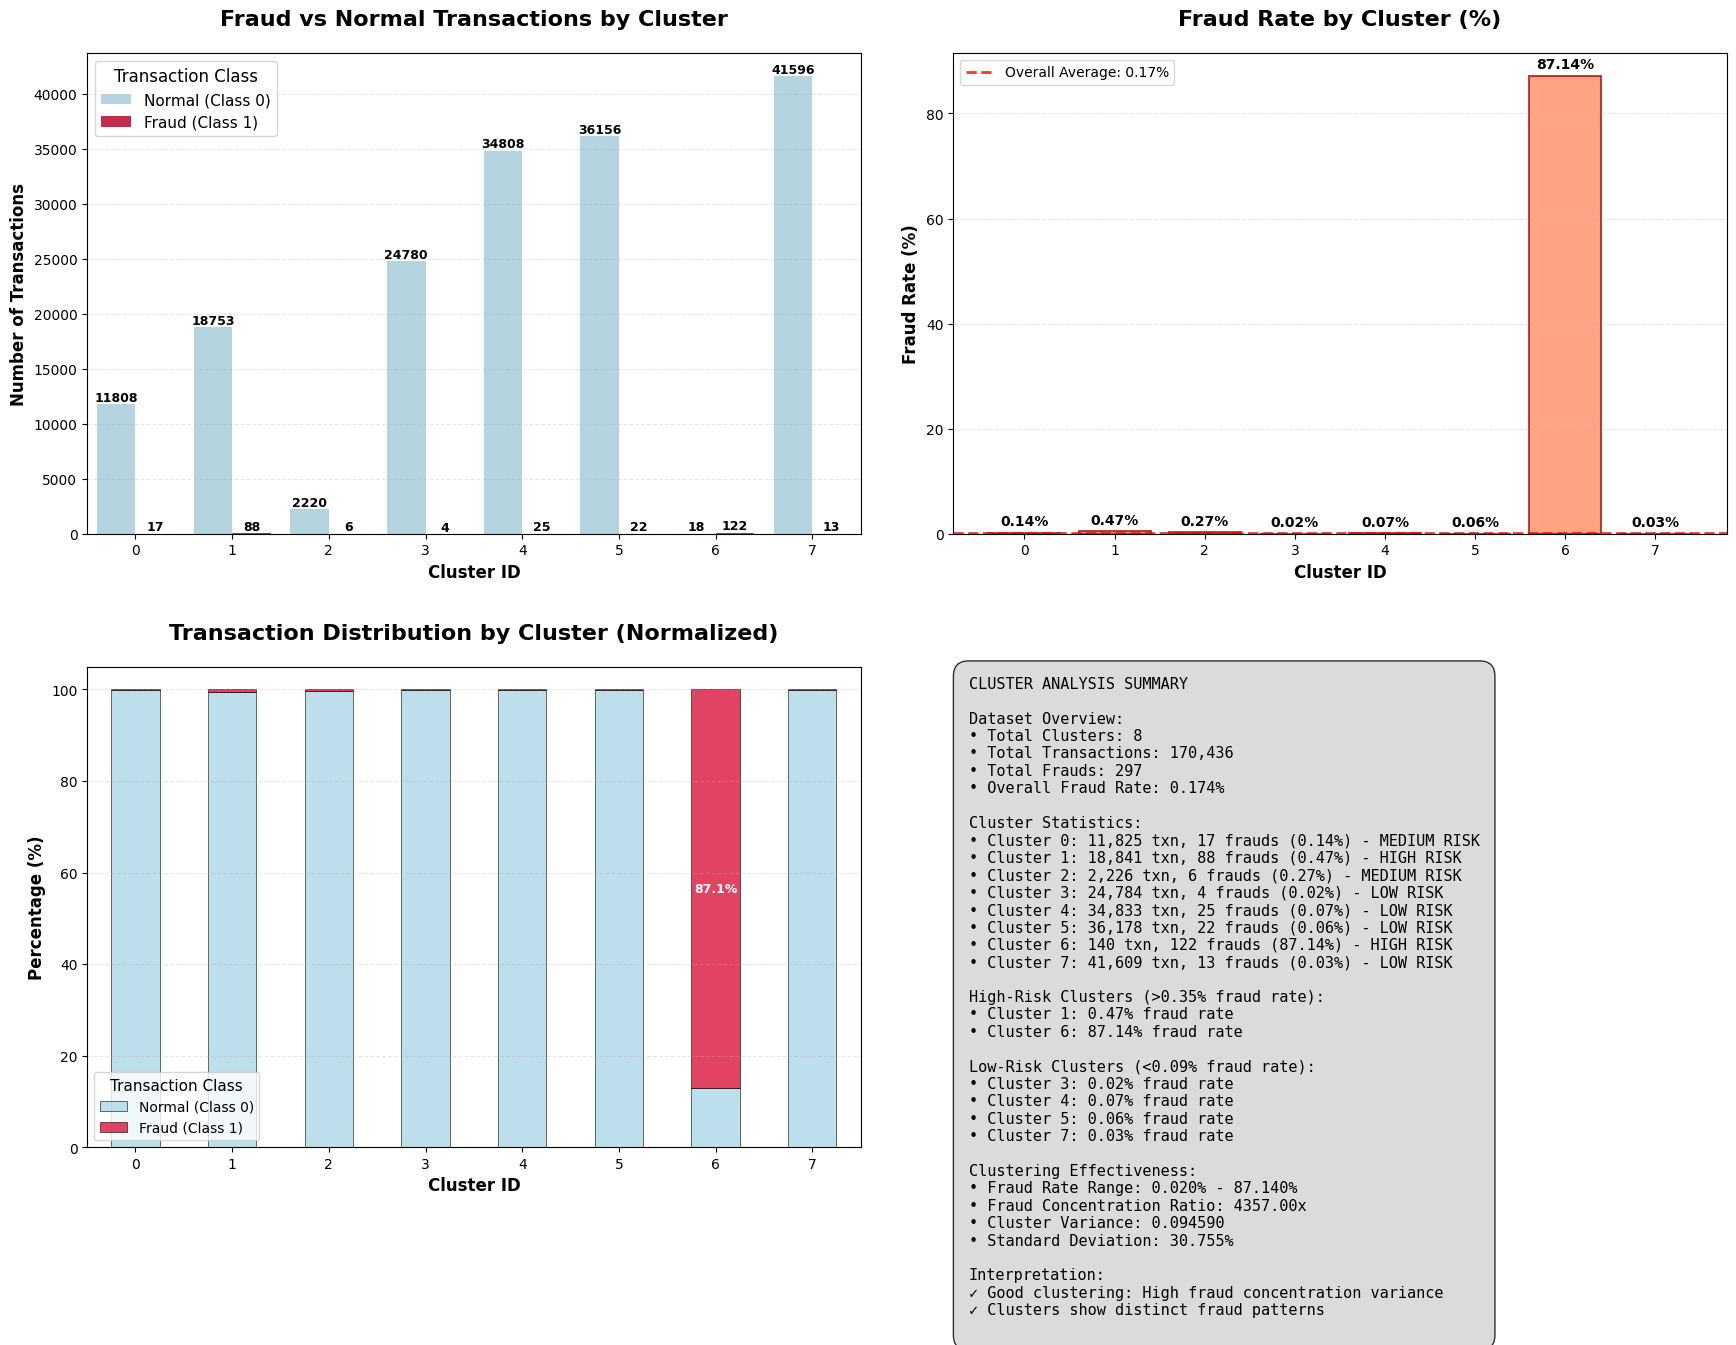

In [20]:

# Calculate cluster statistics
cluster_stats = df_eda.groupby('cluster_id').agg({
    'Class': ['count', 'sum', 'mean'],
}).round(4)
cluster_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
cluster_stats = cluster_stats.reset_index()

# Create comprehensive cluster analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

ax1 = axes[0, 0]
sns.countplot(x='cluster_id', hue='Class', data=df_eda, palette=['lightblue', 'crimson'], ax=ax1)

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fontsize=9, fontweight='bold')

ax1.set_title('Fraud vs Normal Transactions by Cluster', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Cluster ID', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
ax1.legend(title='Transaction Class', labels=['Normal (Class 0)', 'Fraud (Class 1)'], 
           title_fontsize=12, fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# 2. Fraud rate by cluster (percentage)
ax2 = axes[0, 1]
bars = ax2.bar(cluster_stats['cluster_id'], cluster_stats['fraud_rate'] * 100, 
               color='coral', alpha=0.7, edgecolor='darkred', linewidth=1.5)
ax2.set_title('Fraud Rate by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Cluster ID', fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add average fraud rate line
overall_fraud_rate = df_eda['Class'].mean() * 100
ax2.axhline(y=overall_fraud_rate, color='red', linestyle='--', alpha=0.8, linewidth=2,
           label=f'Overall Average: {overall_fraud_rate:.2f}%')
ax2.legend(fontsize=10)

# Add value labels on bars
for bar, rate in zip(bars, cluster_stats['fraud_rate'] * 100):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(cluster_stats['fraud_rate'] * 100)*0.01,
             f'{rate:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Stacked percentage bar chart
ax3 = axes[1, 0]
pivot_data = pd.crosstab(df_eda['cluster_id'], df_eda['Class'], normalize='index') * 100
pivot_data.plot(kind='bar', stacked=True, ax=ax3, color=['lightblue', 'crimson'], 
                alpha=0.8, edgecolor='black', linewidth=0.5)
ax3.set_title('Transaction Distribution by Cluster (Normalized)', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Cluster ID', fontsize=12, fontweight='bold')
ax3.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax3.legend(title='Transaction Class', labels=['Normal (Class 0)', 'Fraud (Class 1)'], 
           title_fontsize=11, fontsize=10)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Add percentage labels for fraud rates
for i, (idx, row) in enumerate(pivot_data.iterrows()):
    fraud_pct = row[1]  # Class 1 percentage
    if fraud_pct > 2:  # Only show label if fraud percentage > 2%
        ax3.text(i, row[0] + fraud_pct/2, f'{fraud_pct:.1f}%', 
                ha='center', va='center', fontweight='bold', fontsize=9, color='white')

# 4. Cluster statistics summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Create detailed statistics
n_clusters = len(cluster_stats)
total_transactions = len(df_eda)
total_frauds = len(df_eda[df_eda['Class'] == 1])

# Find high-risk and low-risk clusters
high_risk_threshold = overall_fraud_rate / 100 * 2  # 2x average
high_risk_clusters = cluster_stats[cluster_stats['fraud_rate'] > high_risk_threshold]
low_risk_clusters = cluster_stats[cluster_stats['fraud_rate'] < overall_fraud_rate / 100 * 0.5]

# Create summary text
summary_text = f"""CLUSTER ANALYSIS SUMMARY

Dataset Overview:
• Total Clusters: {n_clusters}
• Total Transactions: {total_transactions:,}
• Total Frauds: {total_frauds:,}
• Overall Fraud Rate: {overall_fraud_rate:.3f}%

Cluster Statistics:
"""

# Add individual cluster stats
for _, row in cluster_stats.iterrows():
    cluster_id = int(row['cluster_id'])
    total_txn = int(row['total_transactions'])
    fraud_count = int(row['fraud_count'])
    fraud_rate = row['fraud_rate'] * 100
    
    risk_level = "HIGH" if fraud_rate > overall_fraud_rate * 2 else "LOW" if fraud_rate < overall_fraud_rate * 0.5 else "MEDIUM"
    summary_text += f"• Cluster {cluster_id}: {total_txn:,} txn, {fraud_count} frauds ({fraud_rate:.2f}%) - {risk_level} RISK\n"

summary_text += f"\nHigh-Risk Clusters (>{overall_fraud_rate*2:.2f}% fraud rate):"
if len(high_risk_clusters) > 0:
    for _, row in high_risk_clusters.iterrows():
        summary_text += f"\n• Cluster {int(row['cluster_id'])}: {row['fraud_rate']*100:.2f}% fraud rate"
else:
    summary_text += "\n• None identified"

summary_text += f"\n\nLow-Risk Clusters (<{overall_fraud_rate*0.5:.2f}% fraud rate):"
if len(low_risk_clusters) > 0:
    for _, row in low_risk_clusters.iterrows():
        summary_text += f"\n• Cluster {int(row['cluster_id'])}: {row['fraud_rate']*100:.2f}% fraud rate"
else:
    summary_text += "\n• None identified"

# Calculate cluster effectiveness metrics
fraud_concentration = (cluster_stats['fraud_rate'].max() / cluster_stats['fraud_rate'].min()) if cluster_stats['fraud_rate'].min() > 0 else np.inf
cluster_variance = cluster_stats['fraud_rate'].var()

summary_text += f"""

Clustering Effectiveness:
• Fraud Rate Range: {cluster_stats['fraud_rate'].min()*100:.3f}% - {cluster_stats['fraud_rate'].max()*100:.3f}%
• Fraud Concentration Ratio: {fraud_concentration:.2f}x
• Cluster Variance: {cluster_variance:.6f}
• Standard Deviation: {cluster_stats['fraud_rate'].std()*100:.3f}%

Interpretation:
"""

if fraud_concentration > 5:
    summary_text += "✓ Good clustering: High fraud concentration variance\n"
elif fraud_concentration > 2:
    summary_text += "◐ Moderate clustering: Some fraud concentration\n"
else:
    summary_text += "✗ Poor clustering: Low fraud concentration variance\n"

if cluster_variance > 0.001:
    summary_text += "✓ Clusters show distinct fraud patterns\n"
else:
    summary_text += "◐ Clusters have similar fraud patterns\n"

ax4.text(0.02, 0.98, summary_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()



In [21]:
# Print detailed cluster analysis
print("=== DETAILED CLUSTER ANALYSIS ===")
print(f"\nOverall Statistics:")
print(f"Number of clusters: {n_clusters}")
print(f"Total transactions: {total_transactions:,}")
print(f"Total fraudulent transactions: {total_frauds:,}")
print(f"Overall fraud rate: {overall_fraud_rate:.4f}%")

print(f"\nCluster-wise Breakdown:")
for _, row in cluster_stats.iterrows():
    cluster_id = int(row['cluster_id'])
    total_txn = int(row['total_transactions'])
    fraud_count = int(row['fraud_count'])
    fraud_rate = row['fraud_rate'] * 100
    normal_count = total_txn - fraud_count
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Total transactions: {total_txn:,} ({total_txn/total_transactions*100:.1f}% of dataset)")
    print(f"  Normal transactions: {normal_count:,}")
    print(f"  Fraudulent transactions: {fraud_count:,}")
    print(f"  Fraud rate: {fraud_rate:.4f}%")
    print(f"  Risk level: {'HIGH' if fraud_rate > overall_fraud_rate * 2 else 'LOW' if fraud_rate < overall_fraud_rate * 0.5 else 'MEDIUM'}")

print(f"\nClustering Quality Assessment:")
print(f"Fraud rate variance across clusters: {cluster_variance:.6f}")
print(f"Standard deviation of fraud rates: {cluster_stats['fraud_rate'].std()*100:.3f}%")
print(f"Coefficient of variation: {cluster_stats['fraud_rate'].std()/cluster_stats['fraud_rate'].mean():.3f}")

if len(high_risk_clusters) > 0:
    print(f"\nHigh-Risk Clusters Identified: {len(high_risk_clusters)}")
    for _, row in high_risk_clusters.iterrows():
        print(f"  Cluster {int(row['cluster_id'])}: {row['fraud_rate']*100:.2f}% fraud rate ({int(row['fraud_count'])} frauds)")

if len(low_risk_clusters) > 0:
    print(f"\nLow-Risk Clusters Identified: {len(low_risk_clusters)}")
    for _, row in low_risk_clusters.iterrows():
        print(f"  Cluster {int(row['cluster_id'])}: {row['fraud_rate']*100:.2f}% fraud rate ({int(row['fraud_count'])} frauds)")

print(f"\nRecommendations:")
if fraud_concentration > 5:
    print("✓ Clustering is effective for fraud detection - maintain current approach")
elif fraud_concentration > 2:
    print("◐ Clustering shows moderate effectiveness - consider parameter tuning")
else:
    print("✗ Clustering may not be optimal for fraud detection - consider different algorithms or features")

if len(high_risk_clusters) > 0:
    print(f"• Focus monitoring efforts on high-risk clusters: {high_risk_clusters['cluster_id'].tolist()}")
if len(low_risk_clusters) > 0:
    print(f"• Reduce monitoring intensity for low-risk clusters: {low_risk_clusters['cluster_id'].tolist()}")

=== DETAILED CLUSTER ANALYSIS ===

Overall Statistics:
Number of clusters: 8
Total transactions: 170,436
Total fraudulent transactions: 297
Overall fraud rate: 0.1743%

Cluster-wise Breakdown:

Cluster 0:
  Total transactions: 11,825 (6.9% of dataset)
  Normal transactions: 11,808
  Fraudulent transactions: 17
  Fraud rate: 0.1400%
  Risk level: MEDIUM

Cluster 1:
  Total transactions: 18,841 (11.1% of dataset)
  Normal transactions: 18,753
  Fraudulent transactions: 88
  Fraud rate: 0.4700%
  Risk level: HIGH

Cluster 2:
  Total transactions: 2,226 (1.3% of dataset)
  Normal transactions: 2,220
  Fraudulent transactions: 6
  Fraud rate: 0.2700%
  Risk level: MEDIUM

Cluster 3:
  Total transactions: 24,784 (14.5% of dataset)
  Normal transactions: 24,780
  Fraudulent transactions: 4
  Fraud rate: 0.0200%
  Risk level: LOW

Cluster 4:
  Total transactions: 34,833 (20.4% of dataset)
  Normal transactions: 34,808
  Fraudulent transactions: 25
  Fraud rate: 0.0700%
  Risk level: LOW

Clust

### Key Insights
1. **High-risk clusters:**  
   - **Cluster 1:** 0.47% fraud rate (88 frauds)  
   - **Cluster 6:** 87.14% fraud rate (122 frauds) → extremely concentrated fraud  

2. **Low-risk clusters:**  
   - Clusters 3, 4, 5, 7 → very low fraud rates (0.02%–0.07%)  

3. **Medium-risk clusters:**  
   - Clusters 0, 2 → moderate fraud rates (0.14%–0.27%)  

4. **Fraud distribution is uneven across clusters:**  
   - Standard deviation of fraud rates: 30.755%  
   - Coefficient of variation: 2.79  


<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Does the distance to the nearest cluster differ between normal and fraudulent transactions?
</div>
<a id="import-data"></a>


In [22]:
df_eda.min_cluster_distance


0         2.704377
1         3.361632
2         5.936156
3         3.932493
4         2.117987
            ...   
170431    3.894394
170432    4.739453
170433    4.591880
170434    2.876963
170435    2.757736
Name: min_cluster_distance, Length: 170436, dtype: float64

Validating data...
Dataset shape: (170436, 53)
Unique classes: [np.int64(0), np.int64(1)]
Class distribution: {0: 170139, 1: 297}
Class 0 samples: 170139
Class 1 samples: 297


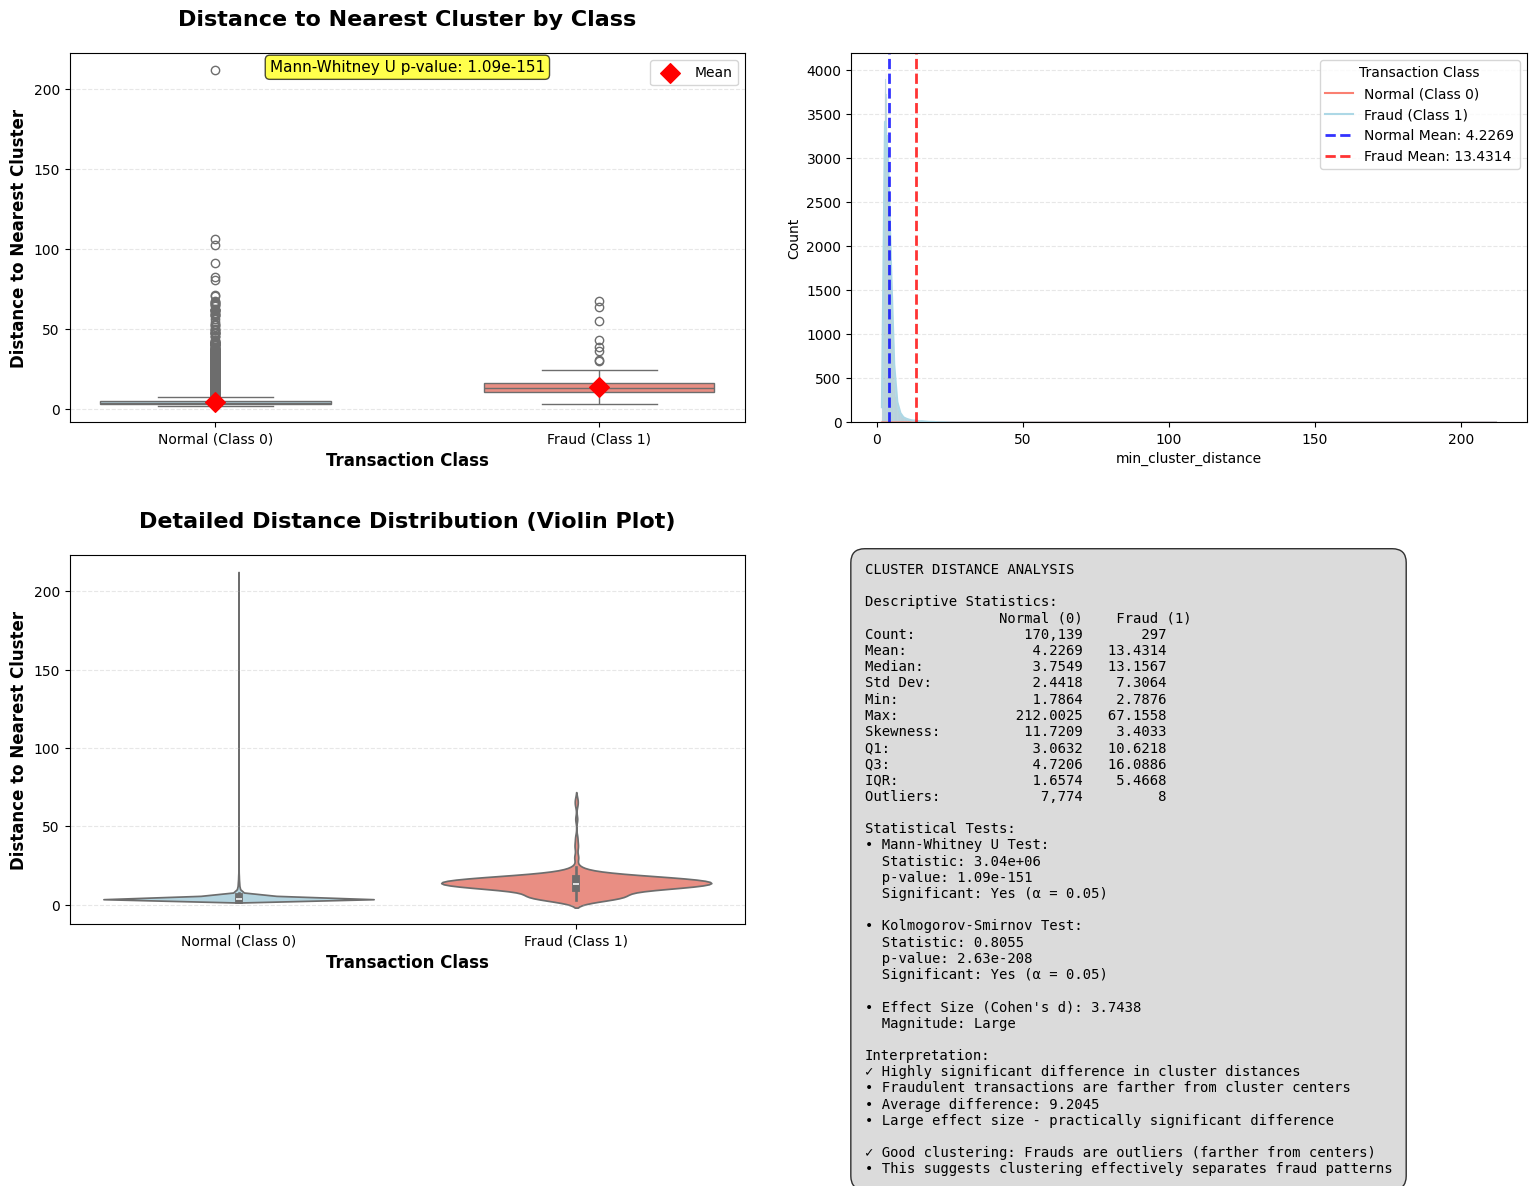

In [23]:
# Validate data and calculate statistics
print("Validating data...")
print(f"Dataset shape: {df_eda.shape}")
print(f"Unique classes: {sorted(df_eda['Class'].unique())}")
print(f"Class distribution: {df_eda['Class'].value_counts().to_dict()}")

# Check if min_cluster_distance column exists
if 'min_cluster_distance' not in df_eda.columns:
    raise ValueError("Column 'min_cluster_distance' not found in df_eda. Available columns: " + str(list(df_eda.columns)))

# Calculate statistics for analysis
class_0_distances = df_eda[df_eda['Class'] == 0]['min_cluster_distance'].dropna()
class_1_distances = df_eda[df_eda['Class'] == 1]['min_cluster_distance'].dropna()

print(f"Class 0 samples: {len(class_0_distances)}")
print(f"Class 1 samples: {len(class_1_distances)}")

# Check if we have data for both classes
if len(class_0_distances) == 0:
    raise ValueError("No Class 0 (normal) transactions found or all have NaN distances")
if len(class_1_distances) == 0:
    raise ValueError("No Class 1 (fraud) transactions found or all have NaN distances")

# Statistical tests (only if we have enough data)
if len(class_0_distances) > 1 and len(class_1_distances) > 1:
    try:
        statistic, p_value = stats.mannwhitneyu(class_0_distances, class_1_distances, alternative='two-sided')
        ks_statistic, ks_p_value = stats.ks_2samp(class_0_distances, class_1_distances)
    except Exception as e:
        print(f"Warning: Statistical tests failed: {e}")
        statistic, p_value = np.nan, 1.0
        ks_statistic, ks_p_value = np.nan, 1.0
else:
    print("Warning: Insufficient data for statistical tests")
    statistic, p_value = np.nan, 1.0
    ks_statistic, ks_p_value = np.nan, 1.0

# Create comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
box_plot = sns.boxplot(x='Class', y='min_cluster_distance', data=df_eda, 
                       palette=['lightblue', 'salmon'], ax=ax1, width=0.6)

# Add mean markers (only if we have data)
try:
    means = df_eda.groupby('Class')['min_cluster_distance'].mean()
    for i, class_val in enumerate(sorted(df_eda['Class'].unique())):
        if class_val in means.index:
            ax1.scatter(i, means[class_val], marker='D', s=100, color='red', zorder=10, 
                       label='Mean' if i == 0 else "")
except Exception as e:
    print(f"Warning: Could not add mean markers: {e}")
    means = pd.Series([class_0_distances.mean(), class_1_distances.mean()], index=[0, 1])

ax1.set_title('Distance to Nearest Cluster by Class', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Transaction Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Distance to Nearest Cluster', fontsize=12, fontweight='bold')
ax1.set_xticklabels(['Normal (Class 0)', 'Fraud (Class 1)'])
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.legend()

# Add statistical annotation
ax1.text(0.5, 0.95, f'Mann-Whitney U p-value: {p_value:.2e}', 
         transform=ax1.transAxes, ha='center', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 2. Distribution comparison with KDE
ax2 = axes[0, 1]
sns.histplot(data=df_eda, x='min_cluster_distance', hue='Class', 
             palette=['lightblue', 'salmon'], alpha=0.6, kde=True, ax=ax2)

# Add mean lines (with error handling)
try:
    if 0 in means.index:
        ax2.axvline(means[0], color='blue', linestyle='--', alpha=0.8, linewidth=2, 
                   label=f'Normal Mean: {means[0]:.4f}')
    if 1 in means.index:
        ax2.axvline(means[1], color='red', linestyle='--', alpha=0.8, linewidth=2, 
                   label=f'Fraud Mean: {means[1]:.4f}')
    
    legend_labels = ['Normal (Class 0)', 'Fraud (Class 1)']
    if 0 in means.index:
        legend_labels.append(f'Normal Mean: {means[0]:.4f}')
    if 1 in means.index:
        legend_labels.append(f'Fraud Mean: {means[1]:.4f}')
    
    ax2.legend(title='Transaction Class', labels=legend_labels)
except Exception as e:
    print(f"Warning: Could not add mean lines: {e}")
    ax2.legend(title='Transaction Class')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# 3. Violin plot for detailed distribution
ax3 = axes[1, 0]
violin_plot = sns.violinplot(x='Class', y='min_cluster_distance', data=df_eda, 
                            palette=['lightblue', 'salmon'], ax=ax3, inner='box')

ax3.set_title('Detailed Distance Distribution (Violin Plot)', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Transaction Class', fontsize=12, fontweight='bold')
ax3.set_ylabel('Distance to Nearest Cluster', fontsize=12, fontweight='bold')
ax3.set_xticklabels(['Normal (Class 0)', 'Fraud (Class 1)'])
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 4. Statistical summary and analysis
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate detailed statistics (with error handling)
try:
    stats_summary = df_eda.groupby('Class')['min_cluster_distance'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max', 'skew'
    ]).round(4)
    
    # Calculate percentiles
    percentiles = df_eda.groupby('Class')['min_cluster_distance'].quantile([0.25, 0.75]).unstack()
    
except Exception as e:
    print(f"Warning: Could not calculate grouped statistics: {e}")
    # Fallback to manual calculation
    stats_summary = pd.DataFrame({
        'count': [len(class_0_distances), len(class_1_distances)],
        'mean': [class_0_distances.mean(), class_1_distances.mean()],
        'median': [class_0_distances.median(), class_1_distances.median()],
        'std': [class_0_distances.std(), class_1_distances.std()],
        'min': [class_0_distances.min(), class_1_distances.min()],
        'max': [class_0_distances.max(), class_1_distances.max()],
        'skew': [class_0_distances.skew(), class_1_distances.skew()]
    }, index=[0, 1]).round(4)
    
    percentiles = pd.DataFrame({
        0: [class_0_distances.quantile(0.25), class_0_distances.quantile(0.75)],
        1: [class_1_distances.quantile(0.25), class_1_distances.quantile(0.75)]
    }, index=[0.25, 0.75])

# Effect size (Cohen's d) with error handling
try:
    if len(class_0_distances) > 0 and len(class_1_distances) > 0:
        pooled_std = np.sqrt(((len(class_0_distances)-1)*class_0_distances.std()**2 + 
                             (len(class_1_distances)-1)*class_1_distances.std()**2) / 
                            (len(class_0_distances) + len(class_1_distances) - 2))
        if pooled_std > 0:
            cohens_d = (means.get(1, class_1_distances.mean()) - means.get(0, class_0_distances.mean())) / pooled_std
        else:
            cohens_d = 0.0
    else:
        cohens_d = 0.0
except Exception as e:
    print(f"Warning: Could not calculate Cohen's d: {e}")
    cohens_d = 0.0

# Outlier analysis
q1_0, q3_0 = class_0_distances.quantile(0.25), class_0_distances.quantile(0.75)
iqr_0 = q3_0 - q1_0
outliers_0 = len(class_0_distances[(class_0_distances < q1_0 - 1.5*iqr_0) | 
                                  (class_0_distances > q3_0 + 1.5*iqr_0)])

q1_1, q3_1 = class_1_distances.quantile(0.25), class_1_distances.quantile(0.75)
iqr_1 = q3_1 - q1_1
outliers_1 = len(class_1_distances[(class_1_distances < q1_1 - 1.5*iqr_1) | 
                                  (class_1_distances > q3_1 + 1.5*iqr_1)])

# Create summary text with safe indexing
try:
    class_0_stats = stats_summary.loc[0] if 0 in stats_summary.index else stats_summary.iloc[0]
    class_1_stats = stats_summary.loc[1] if 1 in stats_summary.index else stats_summary.iloc[1]
    
    class_0_q25 = percentiles.loc[0.25, 0] if 0 in percentiles.columns else class_0_distances.quantile(0.25)
    class_0_q75 = percentiles.loc[0.75, 0] if 0 in percentiles.columns else class_0_distances.quantile(0.75)
    class_1_q25 = percentiles.loc[0.25, 1] if 1 in percentiles.columns else class_1_distances.quantile(0.25)
    class_1_q75 = percentiles.loc[0.75, 1] if 1 in percentiles.columns else class_1_distances.quantile(0.75)
    
    summary_text = f"""CLUSTER DISTANCE ANALYSIS

Descriptive Statistics:
                Normal (0)    Fraud (1)
Count:          {class_0_stats['count']:>10,.0f}  {class_1_stats['count']:>8,.0f}
Mean:           {class_0_stats['mean']:>10.4f}  {class_1_stats['mean']:>8.4f}
Median:         {class_0_stats['median']:>10.4f}  {class_1_stats['median']:>8.4f}
Std Dev:        {class_0_stats['std']:>10.4f}  {class_1_stats['std']:>8.4f}
Min:            {class_0_stats['min']:>10.4f}  {class_1_stats['min']:>8.4f}
Max:            {class_0_stats['max']:>10.4f}  {class_1_stats['max']:>8.4f}
Skewness:       {class_0_stats['skew']:>10.4f}  {class_1_stats['skew']:>8.4f}
Q1:             {class_0_q25:>10.4f}  {class_1_q25:>8.4f}
Q3:             {class_0_q75:>10.4f}  {class_1_q75:>8.4f}
IQR:            {class_0_q75-class_0_q25:>10.4f}  {class_1_q75-class_1_q25:>8.4f}
Outliers:       {outliers_0:>10,}  {outliers_1:>8,}

Statistical Tests:"""
    
    if not np.isnan(p_value):
        summary_text += f"""
• Mann-Whitney U Test:
  Statistic: {statistic:.2e}
  p-value: {p_value:.2e}
  Significant: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)

• Kolmogorov-Smirnov Test:
  Statistic: {ks_statistic:.4f}
  p-value: {ks_p_value:.2e}
  Significant: {'Yes' if ks_p_value < 0.05 else 'No'} (α = 0.05)"""
    else:
        summary_text += """
• Statistical tests could not be performed
  (Insufficient data or calculation error)"""
    
    summary_text += f"""

• Effect Size (Cohen's d): {cohens_d:.4f}
  Magnitude: {'Small' if abs(cohens_d) < 0.5 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'}

Interpretation:
"""
    
except Exception as e:
    print(f"Warning: Error creating summary text: {e}")
    summary_text = f"""CLUSTER DISTANCE ANALYSIS

Error in detailed statistics calculation.
Basic Information:
• Class 0 samples: {len(class_0_distances):,}
• Class 1 samples: {len(class_1_distances):,}
• Class 0 mean distance: {class_0_distances.mean():.4f}
• Class 1 mean distance: {class_1_distances.mean():.4f}

Statistical tests: {'Available' if not np.isnan(p_value) else 'Unavailable'}
Cohen's d: {cohens_d:.4f}

Interpretation:
"""

# Add interpretation with safe mean access
try:
    mean_0 = means.get(0, class_0_distances.mean()) if hasattr(means, 'get') else class_0_distances.mean()
    mean_1 = means.get(1, class_1_distances.mean()) if hasattr(means, 'get') else class_1_distances.mean()
    
    if not np.isnan(p_value):
        if p_value < 0.001:
            summary_text += "✓ Highly significant difference in cluster distances\n"
        elif p_value < 0.05:
            summary_text += "✓ Significant difference in cluster distances\n"
        else:
            summary_text += "✗ No significant difference in cluster distances\n"
    
    if mean_1 > mean_0:
        summary_text += f"• Fraudulent transactions are farther from cluster centers\n"
        summary_text += f"• Average difference: {mean_1 - mean_0:.4f}\n"
    else:
        summary_text += f"• Normal transactions are farther from cluster centers\n"
        summary_text += f"• Average difference: {mean_0 - mean_1:.4f}\n"
    
    if abs(cohens_d) >= 0.8:
        summary_text += "• Large effect size - practically significant difference\n"
    elif abs(cohens_d) >= 0.5:
        summary_text += "• Medium effect size - moderate practical significance\n"
    elif abs(cohens_d) >= 0.2:
        summary_text += "• Small effect size - limited practical significance\n"
    else:
        summary_text += "• Negligible effect size - minimal practical difference\n"
    
    # Clustering quality assessment
    if mean_1 > mean_0 and (np.isnan(p_value) or p_value < 0.05):
        summary_text += "\n✓ Good clustering: Frauds are outliers (farther from centers)\n"
        summary_text += "• This suggests clustering effectively separates fraud patterns"
    elif mean_0 > mean_1 and (np.isnan(p_value) or p_value < 0.05):
        summary_text += "\n◐ Inverse pattern: Normal transactions farther from centers\n"
        summary_text += "• Consider investigating cluster formation process"
    else:
        summary_text += "\n✗ Poor separation: No significant distance difference\n"
        summary_text += "• Clustering may not effectively distinguish fraud patterns"
        
except Exception as e:
    summary_text += f"\nError in interpretation: {e}\n"

ax4.text(0.02, 0.98, summary_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()



In [24]:
# Print detailed analysis
print("=== CLUSTER DISTANCE DETAILED ANALYSIS ===")

print(f"\nBasic Statistics:")
print(f"Normal transactions (Class 0): {len(class_0_distances):,} samples")
print(f"  Mean distance: {means[0]:.6f}")
print(f"  Median distance: {stats_summary.loc[0, 'median']:.6f}")
print(f"  Standard deviation: {stats_summary.loc[0, 'std']:.6f}")

print(f"\nFraudulent transactions (Class 1): {len(class_1_distances):,} samples")
print(f"  Mean distance: {means[1]:.6f}")
print(f"  Median distance: {stats_summary.loc[1, 'median']:.6f}")
print(f"  Standard deviation: {stats_summary.loc[1, 'std']:.6f}")

print(f"\nComparative Analysis:")
print(f"Difference in means: {abs(means[1] - means[0]):.6f}")
print(f"Ratio of means: {means[1]/means[0]:.4f}" if means[0] != 0 else "Ratio undefined (division by zero)")
print(f"Effect size (Cohen's d): {cohens_d:.4f}")

print(f"\nStatistical Significance:")
print(f"Mann-Whitney U test p-value: {p_value:.2e}")
print(f"Kolmogorov-Smirnov test p-value: {ks_p_value:.2e}")
print(f"Both tests significant at α = 0.05: {'Yes' if p_value < 0.05 and ks_p_value < 0.05 else 'No'}")

print(f"\nOutlier Analysis:")
print(f"Normal transactions outliers: {outliers_0:,} ({outliers_0/len(class_0_distances)*100:.2f}%)")
print(f"Fraudulent transactions outliers: {outliers_1:,} ({outliers_1/len(class_1_distances)*100:.2f}%)")

print(f"\nClustering Quality Assessment:")
if means[1] > means[0] and p_value < 0.05:
    print("✓ GOOD: Fraudulent transactions are significantly farther from cluster centers")
    print("  This indicates that fraud represents anomalous patterns in the feature space")
    print("  The clustering algorithm successfully identifies normal transaction patterns")
elif p_value < 0.05:
    print("◐ MIXED: Significant difference exists but normal transactions are farther")
    print("  This may indicate that the clustering captured fraud patterns as 'normal'")
    print("  Consider reviewing clustering parameters or feature selection")
else:
    print("✗ POOR: No significant difference in cluster distances")
    print("  The clustering does not effectively separate fraud from normal patterns")
    print("  Consider alternative clustering approaches or additional features")

# Distance-based fraud detection potential
threshold_candidates = np.percentile(class_0_distances, [90, 95, 99])
print(f"\nDistance-based Detection Potential:")
for i, threshold in enumerate(threshold_candidates):
    pct = [90, 95, 99][i]
    fraud_detected = len(class_1_distances[class_1_distances > threshold])
    false_positives = len(class_0_distances[class_0_distances > threshold])
    precision = fraud_detected / (fraud_detected + false_positives) if (fraud_detected + false_positives) > 0 else 0
    recall = fraud_detected / len(class_1_distances) if len(class_1_distances) > 0 else 0
    
    print(f"  {pct}th percentile threshold ({threshold:.4f}):")
    print(f"    Frauds detected: {fraud_detected}/{len(class_1_distances)} ({recall*100:.1f}% recall)")
    print(f"    False positives: {false_positives:,} ({precision*100:.1f}% precision)")

=== CLUSTER DISTANCE DETAILED ANALYSIS ===

Basic Statistics:
Normal transactions (Class 0): 170,139 samples
  Mean distance: 4.226892
  Median distance: 3.754900
  Standard deviation: 2.441800

Fraudulent transactions (Class 1): 297 samples
  Mean distance: 13.431432
  Median distance: 13.156700
  Standard deviation: 7.306400

Comparative Analysis:
Difference in means: 9.204540
Ratio of means: 3.1776
Effect size (Cohen's d): 3.7438

Statistical Significance:
Mann-Whitney U test p-value: 1.09e-151
Kolmogorov-Smirnov test p-value: 2.63e-208
Both tests significant at α = 0.05: Yes

Outlier Analysis:
Normal transactions outliers: 7,774 (4.57%)
Fraudulent transactions outliers: 8 (2.69%)

Clustering Quality Assessment:
✓ GOOD: Fraudulent transactions are significantly farther from cluster centers
  This indicates that fraud represents anomalous patterns in the feature space
  The clustering algorithm successfully identifies normal transaction patterns

Distance-based Detection Potential:
 

### Key Insight
- **Fraudulent transactions lie significantly farther from cluster centers**, making distance a strong indicator.  
- However, using distance thresholds alone causes **low precision (many false positives)**.  
- Best use case: **combine distance with other features or models** for effective fraud detection.  

<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Does the row mean distinguish between Class=0 and Class=1?
</div>
<a id="import-data"></a>


Validating row mean data...
Dataset shape: (170436, 53)
Unique classes: [np.int64(0), np.int64(1)]
Class 0 samples with row_mean: 170139
Class 1 samples with row_mean: 297


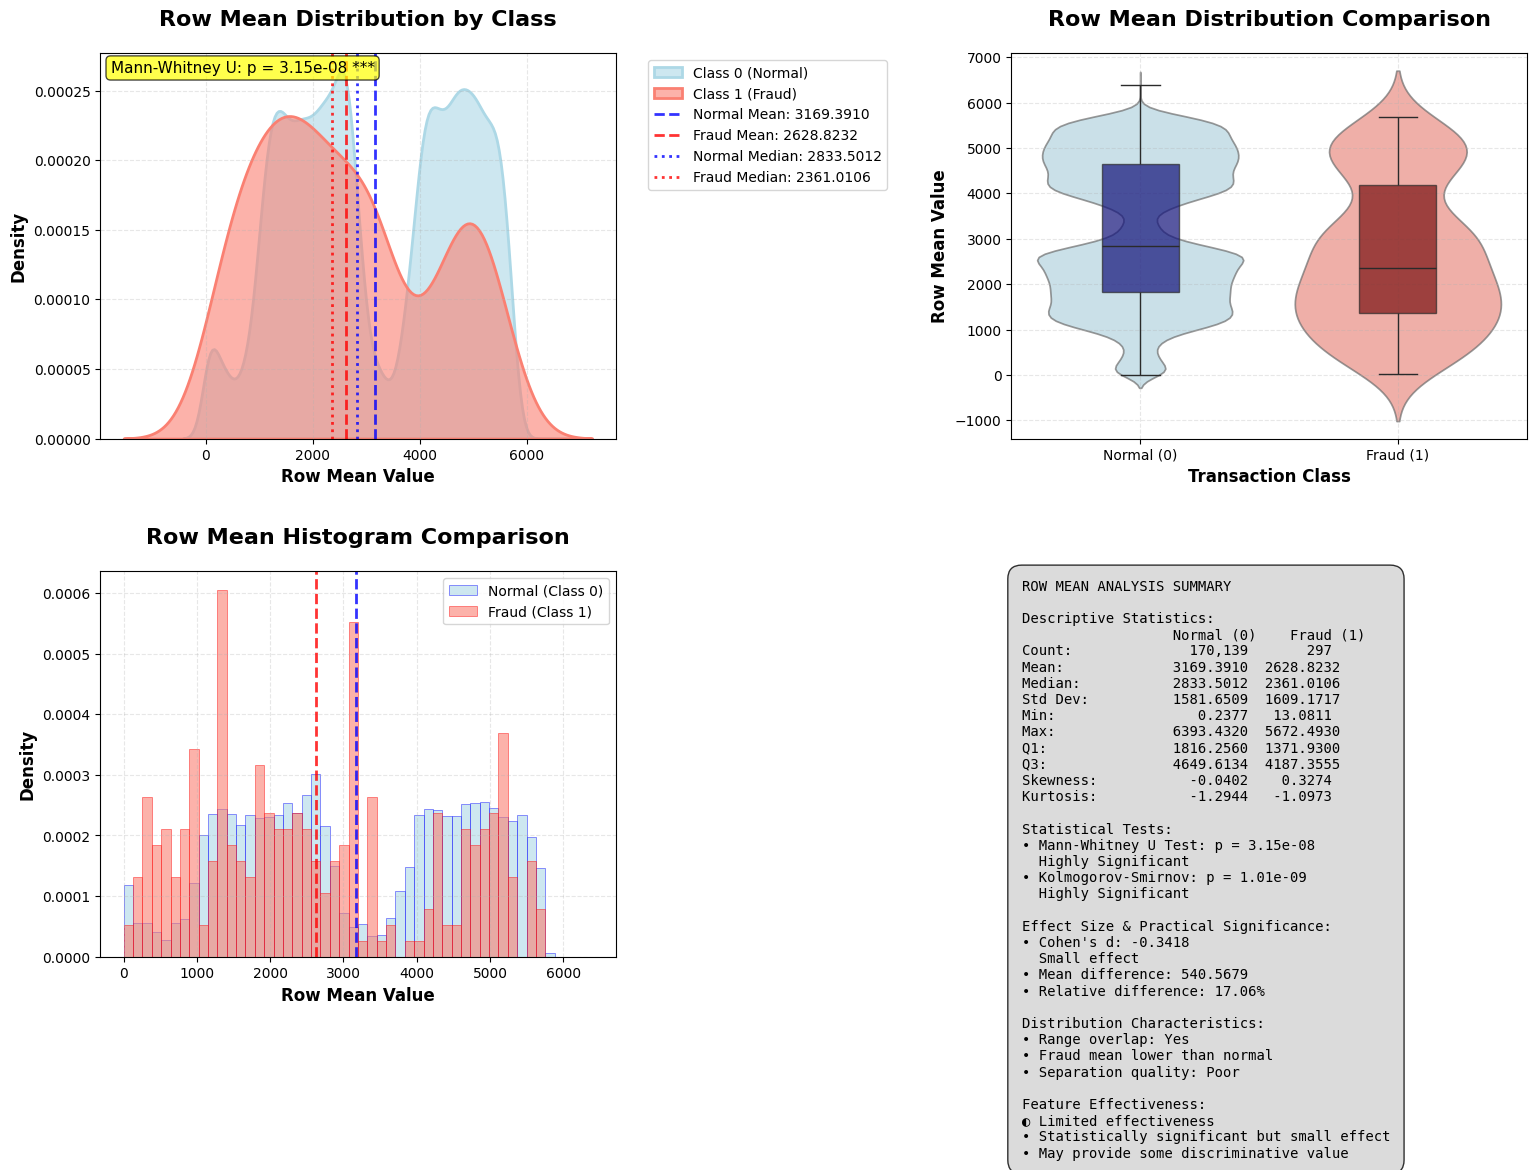

In [25]:


# Validate data and extract row means
print("Validating row mean data...")
print(f"Dataset shape: {df_eda.shape}")
print(f"Unique classes: {sorted(df_eda['Class'].unique())}")

# Check if row_mean column exists
if 'row_mean' not in df_eda.columns:
    raise ValueError("Column 'row_mean' not found in df_eda. Available columns: " + str(list(df_eda.columns)))

# Extract data for analysis
class_0_means = df_eda[df_eda['Class'] == 0]['row_mean'].dropna()
class_1_means = df_eda[df_eda['Class'] == 1]['row_mean'].dropna()

print(f"Class 0 samples with row_mean: {len(class_0_means)}")
print(f"Class 1 samples with row_mean: {len(class_1_means)}")

# Check data availability
if len(class_0_means) == 0:
    raise ValueError("No Class 0 (normal) transactions with valid row_mean values")
if len(class_1_means) == 0:
    raise ValueError("No Class 1 (fraud) transactions with valid row_mean values")

# Statistical tests
if len(class_0_means) > 1 and len(class_1_means) > 1:
    try:
        statistic, p_value = stats.mannwhitneyu(class_0_means, class_1_means, alternative='two-sided')
        ks_statistic, ks_p_value = stats.ks_2samp(class_0_means, class_1_means)
    except Exception as e:
        print(f"Warning: Statistical tests failed: {e}")
        statistic, p_value = np.nan, 1.0
        ks_statistic, ks_p_value = np.nan, 1.0
else:
    print("Warning: Insufficient data for statistical tests")
    statistic, p_value = np.nan, 1.0
    ks_statistic, ks_p_value = np.nan, 1.0

# Create comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Enhanced KDE plot with statistical annotations
ax1 = axes[0, 0]
sns.kdeplot(data=class_0_means, label='Class 0 (Normal)', fill=True, alpha=0.6, 
            color='lightblue', linewidth=2, ax=ax1)
sns.kdeplot(data=class_1_means, label='Class 1 (Fraud)', fill=True, alpha=0.6, 
            color='salmon', linewidth=2, ax=ax1)

# Add mean and median lines
mean_0, mean_1 = class_0_means.mean(), class_1_means.mean()
median_0, median_1 = class_0_means.median(), class_1_means.median()

ax1.axvline(mean_0, color='blue', linestyle='--', alpha=0.8, linewidth=2, 
           label=f'Normal Mean: {mean_0:.4f}')
ax1.axvline(mean_1, color='red', linestyle='--', alpha=0.8, linewidth=2, 
           label=f'Fraud Mean: {mean_1:.4f}')
ax1.axvline(median_0, color='blue', linestyle=':', alpha=0.8, linewidth=2, 
           label=f'Normal Median: {median_0:.4f}')
ax1.axvline(median_1, color='red', linestyle=':', alpha=0.8, linewidth=2, 
           label=f'Fraud Median: {median_1:.4f}')

ax1.set_title('Row Mean Distribution by Class', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Row Mean Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# Add statistical significance annotation
if not np.isnan(p_value):
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    ax1.text(0.02, 0.95, f'Mann-Whitney U: p = {p_value:.2e} {significance}', 
             transform=ax1.transAxes, fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 2. Box plots with violin overlay
ax2 = axes[0, 1]
# Create dataframe for seaborn
plot_data = pd.concat([
    pd.DataFrame({'row_mean': class_0_means, 'Class': 'Normal (0)'}),
    pd.DataFrame({'row_mean': class_1_means, 'Class': 'Fraud (1)'})
])

# Violin plot
sns.violinplot(data=plot_data, x='Class', y='row_mean', palette=['lightblue', 'salmon'], 
               alpha=0.7, ax=ax2, inner=None)
# Box plot overlay
sns.boxplot(data=plot_data, x='Class', y='row_mean', palette=['darkblue', 'darkred'], 
            ax=ax2, width=0.3, boxprops=dict(alpha=0.7))

ax2.set_title('Row Mean Distribution Comparison', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Transaction Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('Row Mean Value', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')

# 3. Histogram comparison
ax3 = axes[1, 0]
bins = np.histogram_bin_edges(np.concatenate([class_0_means, class_1_means]), bins=50)
ax3.hist(class_0_means, bins=bins, alpha=0.6, color='lightblue', label='Normal (Class 0)', 
         density=True, edgecolor='blue', linewidth=0.5)
ax3.hist(class_1_means, bins=bins, alpha=0.6, color='salmon', label='Fraud (Class 1)', 
         density=True, edgecolor='red', linewidth=0.5)

# Add summary statistics
ax3.axvline(mean_0, color='blue', linestyle='--', alpha=0.8, linewidth=2)
ax3.axvline(mean_1, color='red', linestyle='--', alpha=0.8, linewidth=2)

ax3.set_title('Row Mean Histogram Comparison', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Row Mean Value', fontsize=12, fontweight='bold')
ax3.set_ylabel('Density', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, linestyle='--')

# 4. Statistical summary and analysis
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate comprehensive statistics
try:
    stats_df = pd.DataFrame({
        'Normal (Class 0)': [
            len(class_0_means),
            class_0_means.mean(),
            class_0_means.median(),
            class_0_means.std(),
            class_0_means.min(),
            class_0_means.max(),
            class_0_means.quantile(0.25),
            class_0_means.quantile(0.75),
            class_0_means.skew(),
            class_0_means.kurtosis()
        ],
        'Fraud (Class 1)': [
            len(class_1_means),
            class_1_means.mean(),
            class_1_means.median(),
            class_1_means.std(),
            class_1_means.min(),
            class_1_means.max(),
            class_1_means.quantile(0.25),
            class_1_means.quantile(0.75),
            class_1_means.skew(),
            class_1_means.kurtosis()
        ]
    }, index=['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3', 'Skewness', 'Kurtosis'])
    
    # Effect size calculation
    pooled_std = np.sqrt(((len(class_0_means)-1)*class_0_means.var() + 
                         (len(class_1_means)-1)*class_1_means.var()) / 
                        (len(class_0_means) + len(class_1_means) - 2))
    cohens_d = (mean_1 - mean_0) / pooled_std if pooled_std > 0 else 0
    
    # Overlap analysis
    overlap_range = (max(class_0_means.min(), class_1_means.min()), 
                    min(class_0_means.max(), class_1_means.max()))
    overlap_exists = overlap_range[0] < overlap_range[1]
    
    summary_text = f"""ROW MEAN ANALYSIS SUMMARY

Descriptive Statistics:
                  Normal (0)    Fraud (1)
Count:            {stats_df.loc['Count', 'Normal (Class 0)']:>9,.0f}  {stats_df.loc['Count', 'Fraud (Class 1)']:>8,.0f}
Mean:             {stats_df.loc['Mean', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Mean', 'Fraud (Class 1)']:>8.4f}
Median:           {stats_df.loc['Median', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Median', 'Fraud (Class 1)']:>8.4f}
Std Dev:          {stats_df.loc['Std Dev', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Std Dev', 'Fraud (Class 1)']:>8.4f}
Min:              {stats_df.loc['Min', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Min', 'Fraud (Class 1)']:>8.4f}
Max:              {stats_df.loc['Max', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Max', 'Fraud (Class 1)']:>8.4f}
Q1:               {stats_df.loc['Q1', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Q1', 'Fraud (Class 1)']:>8.4f}
Q3:               {stats_df.loc['Q3', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Q3', 'Fraud (Class 1)']:>8.4f}
Skewness:         {stats_df.loc['Skewness', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Skewness', 'Fraud (Class 1)']:>8.4f}
Kurtosis:         {stats_df.loc['Kurtosis', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Kurtosis', 'Fraud (Class 1)']:>8.4f}

Statistical Tests:"""
    
    if not np.isnan(p_value):
        summary_text += f"""
• Mann-Whitney U Test: p = {p_value:.2e}
  {'Highly Significant' if p_value < 0.001 else 'Significant' if p_value < 0.05 else 'Not Significant'}
• Kolmogorov-Smirnov: p = {ks_p_value:.2e}
  {'Highly Significant' if ks_p_value < 0.001 else 'Significant' if ks_p_value < 0.05 else 'Not Significant'}"""
    else:
        summary_text += """
• Statistical tests unavailable"""
    
    summary_text += f"""

Effect Size & Practical Significance:
• Cohen's d: {cohens_d:.4f}
  {'Large' if abs(cohens_d) >= 0.8 else 'Medium' if abs(cohens_d) >= 0.5 else 'Small' if abs(cohens_d) >= 0.2 else 'Negligible'} effect
• Mean difference: {abs(mean_1 - mean_0):.4f}
• Relative difference: {abs(mean_1 - mean_0)/mean_0*100:.2f}%

Distribution Characteristics:
• Range overlap: {'Yes' if overlap_exists else 'No'}
• Fraud mean {'higher' if mean_1 > mean_0 else 'lower'} than normal
• Separation quality: {'Excellent' if abs(cohens_d) >= 1.0 else 'Good' if abs(cohens_d) >= 0.8 else 'Moderate' if abs(cohens_d) >= 0.5 else 'Poor'}

Feature Effectiveness:
"""
    
    if abs(cohens_d) >= 0.8 and (np.isnan(p_value) or p_value < 0.001):
        summary_text += "✓ Highly effective feature for fraud detection\n"
        summary_text += "• Strong statistical and practical significance\n"
        summary_text += "• Excellent class separation capability"
    elif abs(cohens_d) >= 0.5 and (np.isnan(p_value) or p_value < 0.05):
        summary_text += "✓ Moderately effective feature\n"
        summary_text += "• Significant statistical difference\n" 
        summary_text += "• Good discriminative power"
    elif (np.isnan(p_value) or p_value < 0.05):
        summary_text += "◐ Limited effectiveness\n"
        summary_text += "• Statistically significant but small effect\n"
        summary_text += "• May provide some discriminative value"
    else:
        summary_text += "✗ Ineffective feature\n"
        summary_text += "• No significant difference between classes\n"
        summary_text += "• Poor discriminative capability"

except Exception as e:
    summary_text = f"""ROW MEAN ANALYSIS SUMMARY

Basic Statistics:
• Normal transactions: {len(class_0_means):,} samples
• Fraud transactions: {len(class_1_means):,} samples
• Normal mean: {class_0_means.mean():.4f}
• Fraud mean: {class_1_means.mean():.4f}
• Difference: {abs(class_1_means.mean() - class_0_means.mean()):.4f}

Error in detailed analysis: {str(e)}
"""

ax4.text(0.02, 0.98, summary_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()



In [26]:
# Print detailed console analysis
print("\n=== ROW MEAN DETAILED ANALYSIS ===")
print(f"\nBasic Statistics:")
print(f"Normal transactions (Class 0): {len(class_0_means):,} samples")
print(f"  Mean: {class_0_means.mean():.6f}")
print(f"  Median: {class_0_means.median():.6f}")
print(f"  Standard deviation: {class_0_means.std():.6f}")
print(f"  Range: [{class_0_means.min():.4f}, {class_0_means.max():.4f}]")

print(f"\nFraudulent transactions (Class 1): {len(class_1_means):,} samples")
print(f"  Mean: {class_1_means.mean():.6f}")
print(f"  Median: {class_1_means.median():.6f}")
print(f"  Standard deviation: {class_1_means.std():.6f}")
print(f"  Range: [{class_1_means.min():.4f}, {class_1_means.max():.4f}]")

print(f"\nComparative Analysis:")
print(f"Absolute difference in means: {abs(class_1_means.mean() - class_0_means.mean()):.6f}")
print(f"Relative difference: {abs(class_1_means.mean() - class_0_means.mean())/class_0_means.mean()*100:.2f}%")
print(f"Fraud mean is {'higher' if class_1_means.mean() > class_0_means.mean() else 'lower'} than normal mean")

if not np.isnan(p_value):
    print(f"\nStatistical Tests:")
    print(f"Mann-Whitney U test p-value: {p_value:.2e}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p_value:.2e}")
    print(f"Effect size (Cohen's d): {cohens_d:.4f}")
    print(f"Statistical significance: {'Yes' if p_value < 0.05 else 'No'} at α = 0.05")
    print(f"Practical significance: {'High' if abs(cohens_d) >= 0.8 else 'Medium' if abs(cohens_d) >= 0.5 else 'Low'}")

print(f"\nFeature Quality Assessment:")
if abs(cohens_d) >= 0.8 and (np.isnan(p_value) or p_value < 0.001):
    print("✓ EXCELLENT feature for fraud detection")
    print("  - Strong effect size and high statistical significance")
    print("  - Clear separation between fraud and normal patterns")
    print("  - High discriminative power for classification models")
elif abs(cohens_d) >= 0.5 and (np.isnan(p_value) or p_value < 0.05):
    print("✓ GOOD feature for fraud detection")
    print("  - Moderate effect size with statistical significance")
    print("  - Reasonable separation capability")
    print("  - Valuable for classification models")
elif (np.isnan(p_value) or p_value < 0.05):
    print("◐ LIMITED feature effectiveness")
    print("  - Small effect size despite statistical significance")
    print("  - May provide some discriminative value")
else:
    print("✗ POOR feature effectiveness")
    print("  - No significant difference between classes")
    print("  - Minimal discriminative capability")
    print("  - Consider feature engineering or removal")

# Distribution overlap analysis
overlap_analysis = []
normal_range = (class_0_means.min(), class_0_means.max())
fraud_range = (class_1_means.min(), class_1_means.max())
overlap_start = max(normal_range[0], fraud_range[0])
overlap_end = min(normal_range[1], fraud_range[1])

if overlap_start < overlap_end:
    overlap_size = overlap_end - overlap_start
    normal_size = normal_range[1] - normal_range[0]
    fraud_size = fraud_range[1] - fraud_range[0]
    print(f"\nDistribution Overlap Analysis:")
    print(f"Overlap exists: [{overlap_start:.4f}, {overlap_end:.4f}]")
    print(f"Overlap size: {overlap_size:.4f}")
    print(f"Normal range coverage: {overlap_size/normal_size*100:.1f}%")
    print(f"Fraud range coverage: {overlap_size/fraud_size*100:.1f}%")
else:
    print(f"\nDistribution Overlap Analysis:")
    print("No overlap between class distributions")
    print("Perfect separation - ideal for classification")


=== ROW MEAN DETAILED ANALYSIS ===

Basic Statistics:
Normal transactions (Class 0): 170,139 samples
  Mean: 3169.391032
  Median: 2833.501159
  Standard deviation: 1581.650916
  Range: [0.2377, 6393.4320]

Fraudulent transactions (Class 1): 297 samples
  Mean: 2628.823173
  Median: 2361.010620
  Standard deviation: 1609.171710
  Range: [13.0811, 5672.4930]

Comparative Analysis:
Absolute difference in means: 540.567859
Relative difference: 17.06%
Fraud mean is lower than normal mean

Statistical Tests:
Mann-Whitney U test p-value: 3.15e-08
Kolmogorov-Smirnov test p-value: 1.01e-09
Effect size (Cohen's d): -0.3418
Statistical significance: Yes at α = 0.05
Practical significance: Low

Feature Quality Assessment:
◐ LIMITED feature effectiveness
  - Small effect size despite statistical significance
  - May provide some discriminative value

Distribution Overlap Analysis:
Overlap exists: [13.0811, 5672.4930]
Overlap size: 5659.4119
Normal range coverage: 88.5%
Fraud range coverage: 100.0

<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
   Is row standard deviation related to fraud?

  
</div>
<a id="import-data"></a>


Validating row standard deviation data...
Dataset shape: (170436, 53)
Unique classes: [np.int64(0), np.int64(1)]
Class 0 samples with row_std: 170139
Class 1 samples with row_std: 297


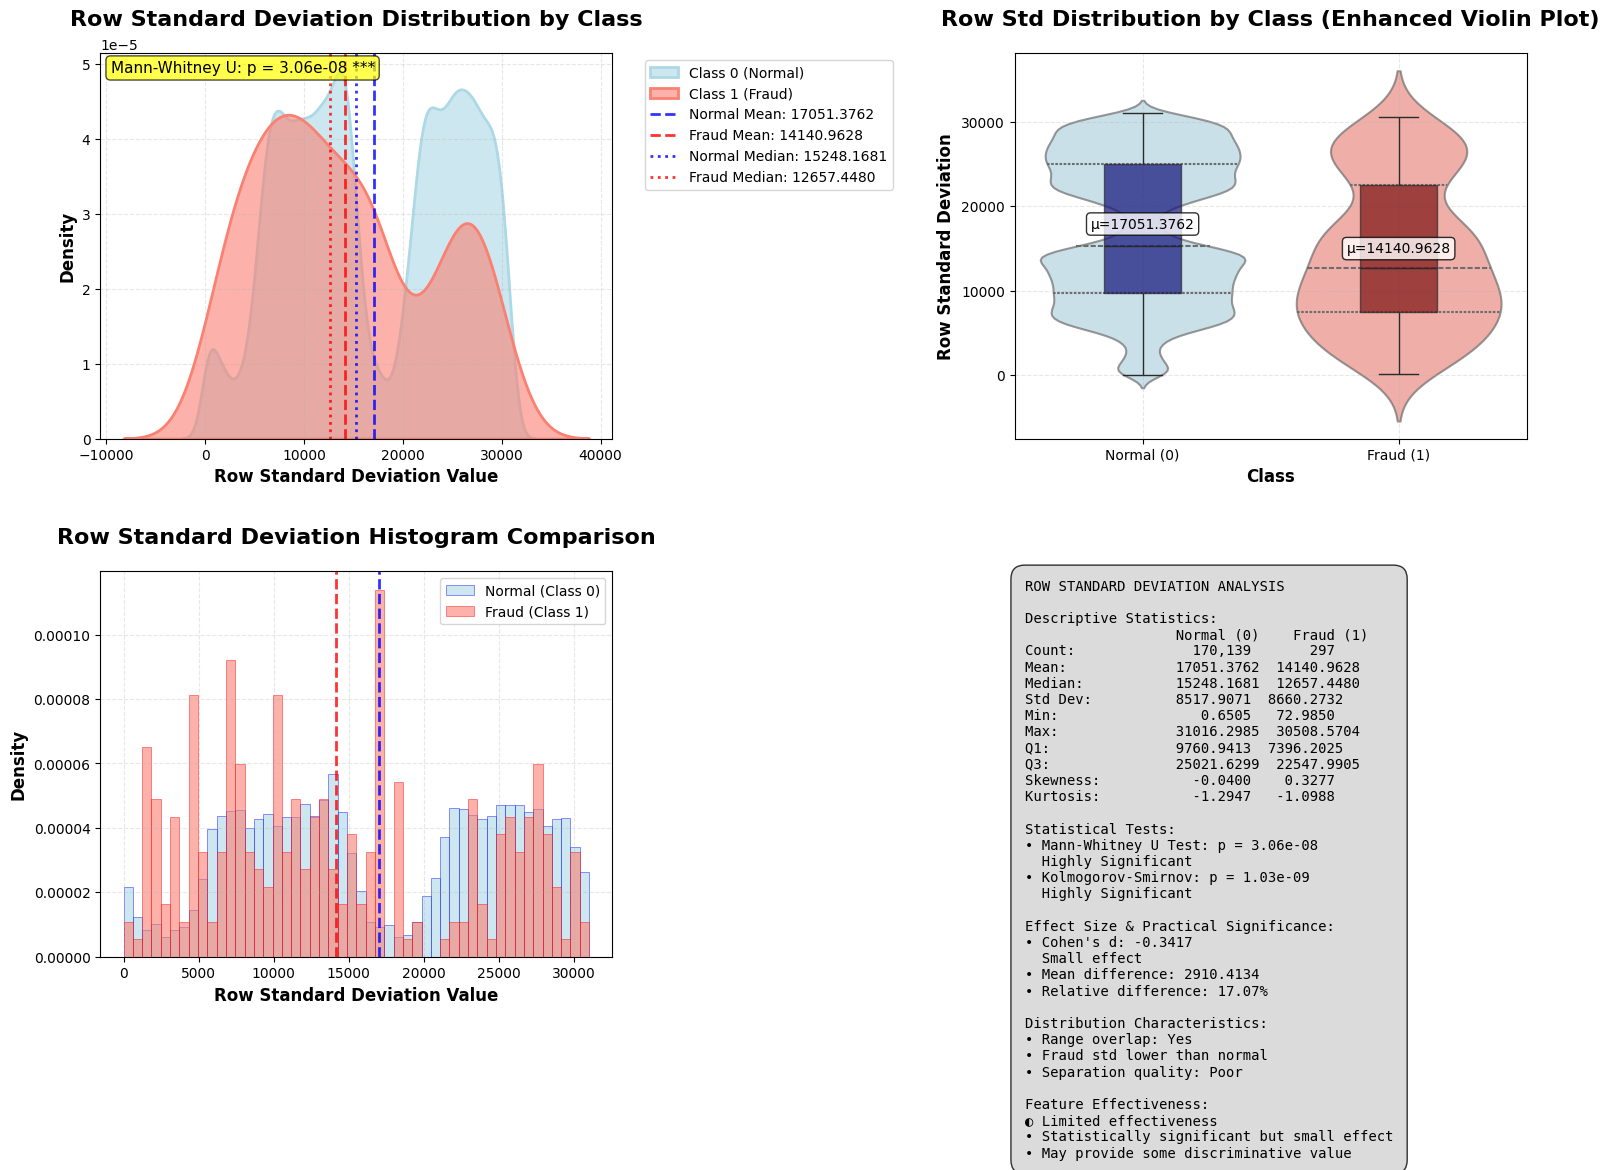

In [27]:
# Validate data and extract row standard deviations
print("Validating row standard deviation data...")
print(f"Dataset shape: {df_eda.shape}")
print(f"Unique classes: {sorted(df_eda['Class'].unique())}")

# Check if row_std column exists
if 'row_std' not in df_eda.columns:
    raise ValueError("Column 'row_std' not found in df_eda. Available columns: " + str(list(df_eda.columns)))

# Extract data for analysis
class_0_stds = df_eda[df_eda['Class'] == 0]['row_std'].dropna()
class_1_stds = df_eda[df_eda['Class'] == 1]['row_std'].dropna()

print(f"Class 0 samples with row_std: {len(class_0_stds)}")
print(f"Class 1 samples with row_std: {len(class_1_stds)}")

# Check data availability
if len(class_0_stds) == 0:
    raise ValueError("No Class 0 (normal) transactions with valid row_std values")
if len(class_1_stds) == 0:
    raise ValueError("No Class 1 (fraud) transactions with valid row_std values")

# Statistical tests
if len(class_0_stds) > 1 and len(class_1_stds) > 1:
    try:
        statistic, p_value = stats.mannwhitneyu(class_0_stds, class_1_stds, alternative='two-sided')
        ks_statistic, ks_p_value = stats.ks_2samp(class_0_stds, class_1_stds)
    except Exception as e:
        print(f"Warning: Statistical tests failed: {e}")
        statistic, p_value = np.nan, 1.0
        ks_statistic, ks_p_value = np.nan, 1.0
else:
    print("Warning: Insufficient data for statistical tests")
    statistic, p_value = np.nan, 1.0
    ks_statistic, ks_p_value = np.nan, 1.0

# Create comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Enhanced KDE plot with statistical annotations
ax1 = axes[0, 0]
sns.kdeplot(data=class_0_stds, label='Class 0 (Normal)', fill=True, alpha=0.6, 
            color='lightblue', linewidth=2, ax=ax1)
sns.kdeplot(data=class_1_stds, label='Class 1 (Fraud)', fill=True, alpha=0.6, 
            color='salmon', linewidth=2, ax=ax1)

# Add mean and median lines
mean_0, mean_1 = class_0_stds.mean(), class_1_stds.mean()
median_0, median_1 = class_0_stds.median(), class_1_stds.median()

ax1.axvline(mean_0, color='blue', linestyle='--', alpha=0.8, linewidth=2, 
           label=f'Normal Mean: {mean_0:.4f}')
ax1.axvline(mean_1, color='red', linestyle='--', alpha=0.8, linewidth=2, 
           label=f'Fraud Mean: {mean_1:.4f}')
ax1.axvline(median_0, color='blue', linestyle=':', alpha=0.8, linewidth=2, 
           label=f'Normal Median: {median_0:.4f}')
ax1.axvline(median_1, color='red', linestyle=':', alpha=0.8, linewidth=2, 
           label=f'Fraud Median: {median_1:.4f}')

ax1.set_title('Row Standard Deviation Distribution by Class', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Row Standard Deviation Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# Add statistical significance annotation
if not np.isnan(p_value):
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    ax1.text(0.02, 0.95, f'Mann-Whitney U: p = {p_value:.2e} {significance}', 
             transform=ax1.transAxes, fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 2. Enhanced Violin plots with box overlay (your original request enhanced)
ax2 = axes[0, 1]
# Create dataframe for seaborn
plot_data = pd.concat([
    pd.DataFrame({'row_std': class_0_stds, 'Class': 'Normal (0)'}),
    pd.DataFrame({'row_std': class_1_stds, 'Class': 'Fraud (1)'})
])

# Violin plot (enhanced version of your original)
violin_parts = sns.violinplot(data=plot_data, x='Class', y='row_std', palette=['lightblue', 'salmon'], 
                              alpha=0.7, ax=ax2, inner='quart', linewidth=1.5)
# Box plot overlay for better statistical insight
sns.boxplot(data=plot_data, x='Class', y='row_std', palette=['darkblue', 'darkred'], 
            ax=ax2, width=0.3, boxprops=dict(alpha=0.7))

# Add mean annotations
for i, (class_name, mean_val) in enumerate([('Normal', mean_0), ('Fraud', mean_1)]):
    ax2.text(i, mean_val, f'μ={mean_val:.4f}', 
             ha='center', va='bottom', fontsize=10, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax2.set_title('Row Std Distribution by Class (Enhanced Violin Plot)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('Row Standard Deviation', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')

# 3. Histogram comparison
ax3 = axes[1, 0]
bins = np.histogram_bin_edges(np.concatenate([class_0_stds, class_1_stds]), bins=50)
ax3.hist(class_0_stds, bins=bins, alpha=0.6, color='lightblue', label='Normal (Class 0)', 
         density=True, edgecolor='blue', linewidth=0.5)
ax3.hist(class_1_stds, bins=bins, alpha=0.6, color='salmon', label='Fraud (Class 1)', 
         density=True, edgecolor='red', linewidth=0.5)

# Add summary statistics
ax3.axvline(mean_0, color='blue', linestyle='--', alpha=0.8, linewidth=2)
ax3.axvline(mean_1, color='red', linestyle='--', alpha=0.8, linewidth=2)

ax3.set_title('Row Standard Deviation Histogram Comparison', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Row Standard Deviation Value', fontsize=12, fontweight='bold')
ax3.set_ylabel('Density', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, linestyle='--')

# 4. Statistical summary and analysis
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate comprehensive statistics
try:
    stats_df = pd.DataFrame({
        'Normal (Class 0)': [
            len(class_0_stds),
            class_0_stds.mean(),
            class_0_stds.median(),
            class_0_stds.std(),
            class_0_stds.min(),
            class_0_stds.max(),
            class_0_stds.quantile(0.25),
            class_0_stds.quantile(0.75),
            class_0_stds.skew(),
            class_0_stds.kurtosis()
        ],
        'Fraud (Class 1)': [
            len(class_1_stds),
            class_1_stds.mean(),
            class_1_stds.median(),
            class_1_stds.std(),
            class_1_stds.min(),
            class_1_stds.max(),
            class_1_stds.quantile(0.25),
            class_1_stds.quantile(0.75),
            class_1_stds.skew(),
            class_1_stds.kurtosis()
        ]
    }, index=['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3', 'Skewness', 'Kurtosis'])
    
    # Effect size calculation
    pooled_std = np.sqrt(((len(class_0_stds)-1)*class_0_stds.var() + 
                         (len(class_1_stds)-1)*class_1_stds.var()) / 
                        (len(class_0_stds) + len(class_1_stds) - 2))
    cohens_d = (mean_1 - mean_0) / pooled_std if pooled_std > 0 else 0
    
    # Overlap analysis
    overlap_range = (max(class_0_stds.min(), class_1_stds.min()), 
                    min(class_0_stds.max(), class_1_stds.max()))
    overlap_exists = overlap_range[0] < overlap_range[1]
    
    summary_text = f"""ROW STANDARD DEVIATION ANALYSIS

Descriptive Statistics:
                  Normal (0)    Fraud (1)
Count:            {stats_df.loc['Count', 'Normal (Class 0)']:>9,.0f}  {stats_df.loc['Count', 'Fraud (Class 1)']:>8,.0f}
Mean:             {stats_df.loc['Mean', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Mean', 'Fraud (Class 1)']:>8.4f}
Median:           {stats_df.loc['Median', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Median', 'Fraud (Class 1)']:>8.4f}
Std Dev:          {stats_df.loc['Std Dev', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Std Dev', 'Fraud (Class 1)']:>8.4f}
Min:              {stats_df.loc['Min', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Min', 'Fraud (Class 1)']:>8.4f}
Max:              {stats_df.loc['Max', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Max', 'Fraud (Class 1)']:>8.4f}
Q1:               {stats_df.loc['Q1', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Q1', 'Fraud (Class 1)']:>8.4f}
Q3:               {stats_df.loc['Q3', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Q3', 'Fraud (Class 1)']:>8.4f}
Skewness:         {stats_df.loc['Skewness', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Skewness', 'Fraud (Class 1)']:>8.4f}
Kurtosis:         {stats_df.loc['Kurtosis', 'Normal (Class 0)']:>9.4f}  {stats_df.loc['Kurtosis', 'Fraud (Class 1)']:>8.4f}

Statistical Tests:"""
    
    if not np.isnan(p_value):
        summary_text += f"""
• Mann-Whitney U Test: p = {p_value:.2e}
  {'Highly Significant' if p_value < 0.001 else 'Significant' if p_value < 0.05 else 'Not Significant'}
• Kolmogorov-Smirnov: p = {ks_p_value:.2e}
  {'Highly Significant' if ks_p_value < 0.001 else 'Significant' if ks_p_value < 0.05 else 'Not Significant'}"""
    else:
        summary_text += """
• Statistical tests unavailable"""
    
    summary_text += f"""

Effect Size & Practical Significance:
• Cohen's d: {cohens_d:.4f}
  {'Large' if abs(cohens_d) >= 0.8 else 'Medium' if abs(cohens_d) >= 0.5 else 'Small' if abs(cohens_d) >= 0.2 else 'Negligible'} effect
• Mean difference: {abs(mean_1 - mean_0):.4f}
• Relative difference: {abs(mean_1 - mean_0)/mean_0*100:.2f}%

Distribution Characteristics:
• Range overlap: {'Yes' if overlap_exists else 'No'}
• Fraud std {'higher' if mean_1 > mean_0 else 'lower'} than normal
• Separation quality: {'Excellent' if abs(cohens_d) >= 1.0 else 'Good' if abs(cohens_d) >= 0.8 else 'Moderate' if abs(cohens_d) >= 0.5 else 'Poor'}

Feature Effectiveness:
"""
    
    if abs(cohens_d) >= 0.8 and (np.isnan(p_value) or p_value < 0.001):
        summary_text += "✓ Highly effective feature for fraud detection\n"
        summary_text += "• Strong statistical and practical significance\n"
        summary_text += "• Excellent class separation capability"
    elif abs(cohens_d) >= 0.5 and (np.isnan(p_value) or p_value < 0.05):
        summary_text += "✓ Moderately effective feature\n"
        summary_text += "• Significant statistical difference\n" 
        summary_text += "• Good discriminative power"
    elif (np.isnan(p_value) or p_value < 0.05):
        summary_text += "◐ Limited effectiveness\n"
        summary_text += "• Statistically significant but small effect\n"
        summary_text += "• May provide some discriminative value"
    else:
        summary_text += "✗ Ineffective feature\n"
        summary_text += "• No significant difference between classes\n"
        summary_text += "• Poor discriminative capability"

except Exception as e:
    summary_text = f"""ROW STD ANALYSIS SUMMARY

Basic Statistics:
• Normal transactions: {len(class_0_stds):,} samples
• Fraud transactions: {len(class_1_stds):,} samples
• Normal mean: {class_0_stds.mean():.4f}
• Fraud mean: {class_1_stds.mean():.4f}
• Difference: {abs(class_1_stds.mean() - class_0_stds.mean()):.4f}

Error in detailed analysis: {str(e)}
"""

ax4.text(0.02, 0.98, summary_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()



In [28]:
# Print detailed console analysis
print("\n=== ROW STANDARD DEVIATION DETAILED ANALYSIS ===")
print(f"\nBasic Statistics:")
print(f"Normal transactions (Class 0): {len(class_0_stds):,} samples")
print(f"  Mean: {class_0_stds.mean():.6f}")
print(f"  Median: {class_0_stds.median():.6f}")
print(f"  Standard deviation: {class_0_stds.std():.6f}")
print(f"  Range: [{class_0_stds.min():.4f}, {class_0_stds.max():.4f}]")

print(f"\nFraudulent transactions (Class 1): {len(class_1_stds):,} samples")
print(f"  Mean: {class_1_stds.mean():.6f}")
print(f"  Median: {class_1_stds.median():.6f}")
print(f"  Standard deviation: {class_1_stds.std():.6f}")
print(f"  Range: [{class_1_stds.min():.4f}, {class_1_stds.max():.4f}]")

print(f"\nComparative Analysis:")
print(f"Absolute difference in means: {abs(class_1_stds.mean() - class_0_stds.mean()):.6f}")
print(f"Relative difference: {abs(class_1_stds.mean() - class_0_stds.mean())/class_0_stds.mean()*100:.2f}%")
print(f"Fraud std is {'higher' if class_1_stds.mean() > class_0_stds.mean() else 'lower'} than normal std")

if not np.isnan(p_value):
    print(f"\nStatistical Tests:")
    print(f"Mann-Whitney U test p-value: {p_value:.2e}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p_value:.2e}")
    print(f"Effect size (Cohen's d): {cohens_d:.4f}")
    print(f"Statistical significance: {'Yes' if p_value < 0.05 else 'No'} at α = 0.05")
    print(f"Practical significance: {'High' if abs(cohens_d) >= 0.8 else 'Medium' if abs(cohens_d) >= 0.5 else 'Low'}")

print(f"\nFeature Quality Assessment:")
if abs(cohens_d) >= 0.8 and (np.isnan(p_value) or p_value < 0.001):
    print("✓ EXCELLENT feature for fraud detection")
    print("  - Strong effect size and high statistical significance")
    print("  - Clear separation between fraud and normal patterns")
    print("  - High discriminative power for classification models")
elif abs(cohens_d) >= 0.5 and (np.isnan(p_value) or p_value < 0.05):
    print("✓ GOOD feature for fraud detection")
    print("  - Moderate effect size with statistical significance")
    print("  - Reasonable separation capability")
    print("  - Valuable for classification models")
elif (np.isnan(p_value) or p_value < 0.05):
    print("◐ LIMITED feature effectiveness")
    print("  - Small effect size despite statistical significance")
    print("  - May provide some discriminative value")
else:
    print("✗ POOR feature effectiveness")
    print("  - No significant difference between classes")
    print("  - Minimal discriminative capability")
    print("  - Consider feature engineering or removal")

# Distribution overlap analysis
overlap_analysis = []
normal_range = (class_0_stds.min(), class_0_stds.max())
fraud_range = (class_1_stds.min(), class_1_stds.max())
overlap_start = max(normal_range[0], fraud_range[0])
overlap_end = min(normal_range[1], fraud_range[1])

if overlap_start < overlap_end:
    overlap_size = overlap_end - overlap_start
    normal_size = normal_range[1] - normal_range[0]
    fraud_size = fraud_range[1] - fraud_range[0]
    print(f"\nDistribution Overlap Analysis:")
    print(f"Overlap exists: [{overlap_start:.4f}, {overlap_end:.4f}]")
    print(f"Overlap size: {overlap_size:.4f}")
    print(f"Normal range coverage: {overlap_size/normal_size*100:.1f}%")
    print(f"Fraud range coverage: {overlap_size/fraud_size*100:.1f}%")
else:
    print(f"\nDistribution Overlap Analysis:")
    print("No overlap between class distributions")
    print("Perfect separation - ideal for classification")



=== ROW STANDARD DEVIATION DETAILED ANALYSIS ===

Basic Statistics:
Normal transactions (Class 0): 170,139 samples
  Mean: 17051.376176
  Median: 15248.168060
  Standard deviation: 8517.907111
  Range: [0.6505, 31016.2985]

Fraudulent transactions (Class 1): 297 samples
  Mean: 14140.962780
  Median: 12657.448001
  Standard deviation: 8660.273217
  Range: [72.9850, 30508.5704]

Comparative Analysis:
Absolute difference in means: 2910.413396
Relative difference: 17.07%
Fraud std is lower than normal std

Statistical Tests:
Mann-Whitney U test p-value: 3.06e-08
Kolmogorov-Smirnov test p-value: 1.03e-09
Effect size (Cohen's d): -0.3417
Statistical significance: Yes at α = 0.05
Practical significance: Low

Feature Quality Assessment:
◐ LIMITED feature effectiveness
  - Small effect size despite statistical significance
  - May provide some discriminative value

Distribution Overlap Analysis:
Overlap exists: [72.9850, 30508.5704]
Overlap size: 30435.5855
Normal range coverage: 98.1%
Fraud 

### Key Insight
Row standard deviation shows a **statistically significant but weak difference** between fraud and normal transactions.  
Because the distributions overlap almost completely, it has **limited discriminative power** and is best used as a **supporting feature** rather than a primary predictor.  


<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
  Which PCA components or features are most influential for fraud?

  
</div>
<a id="import-data"></a>


Creating comprehensive PCA features analysis...


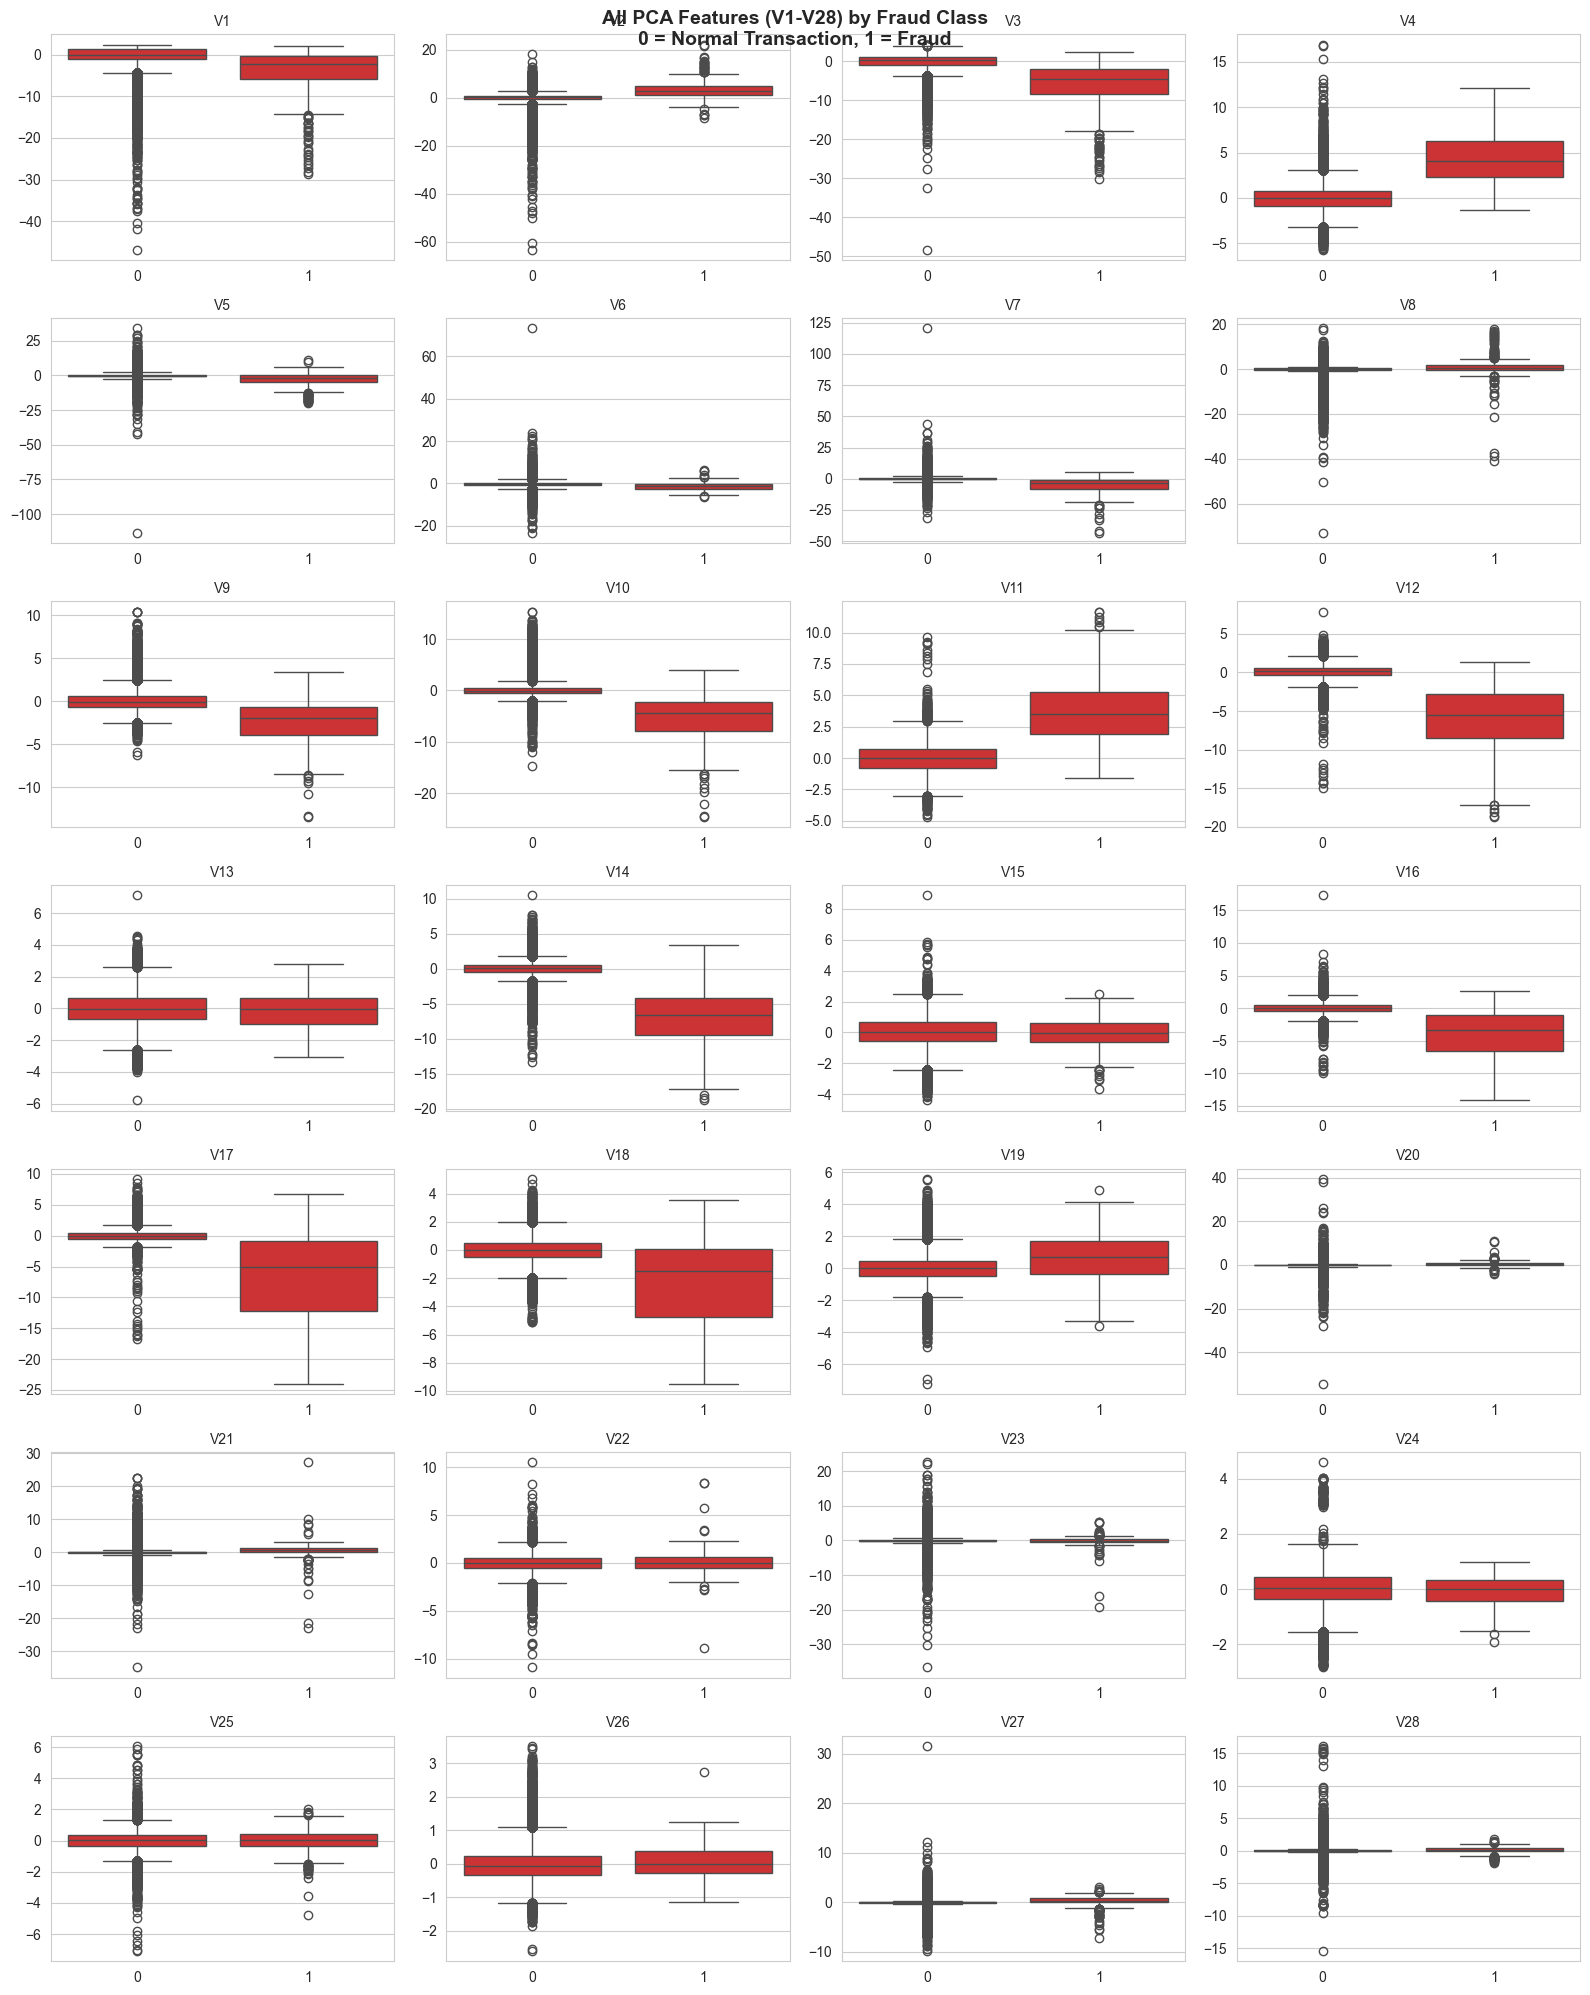


Analyzing feature importance...
Top 10 Most Important PCA Features (by median difference):
 1. V14 - Difference:   6.7168
 2. V12 - Difference:   5.6211
 3. V17 - Difference:   5.0690
 4. V3  - Difference:   4.9016
 5. V10 - Difference:   4.3727
 6. V4  - Difference:   4.0608
 7. V11 - Difference:   3.5697
 8. V16 - Difference:   3.3849
 9. V7  - Difference:   3.0478
10. V2  - Difference:   2.5539

Creating detailed view of top 6 features...


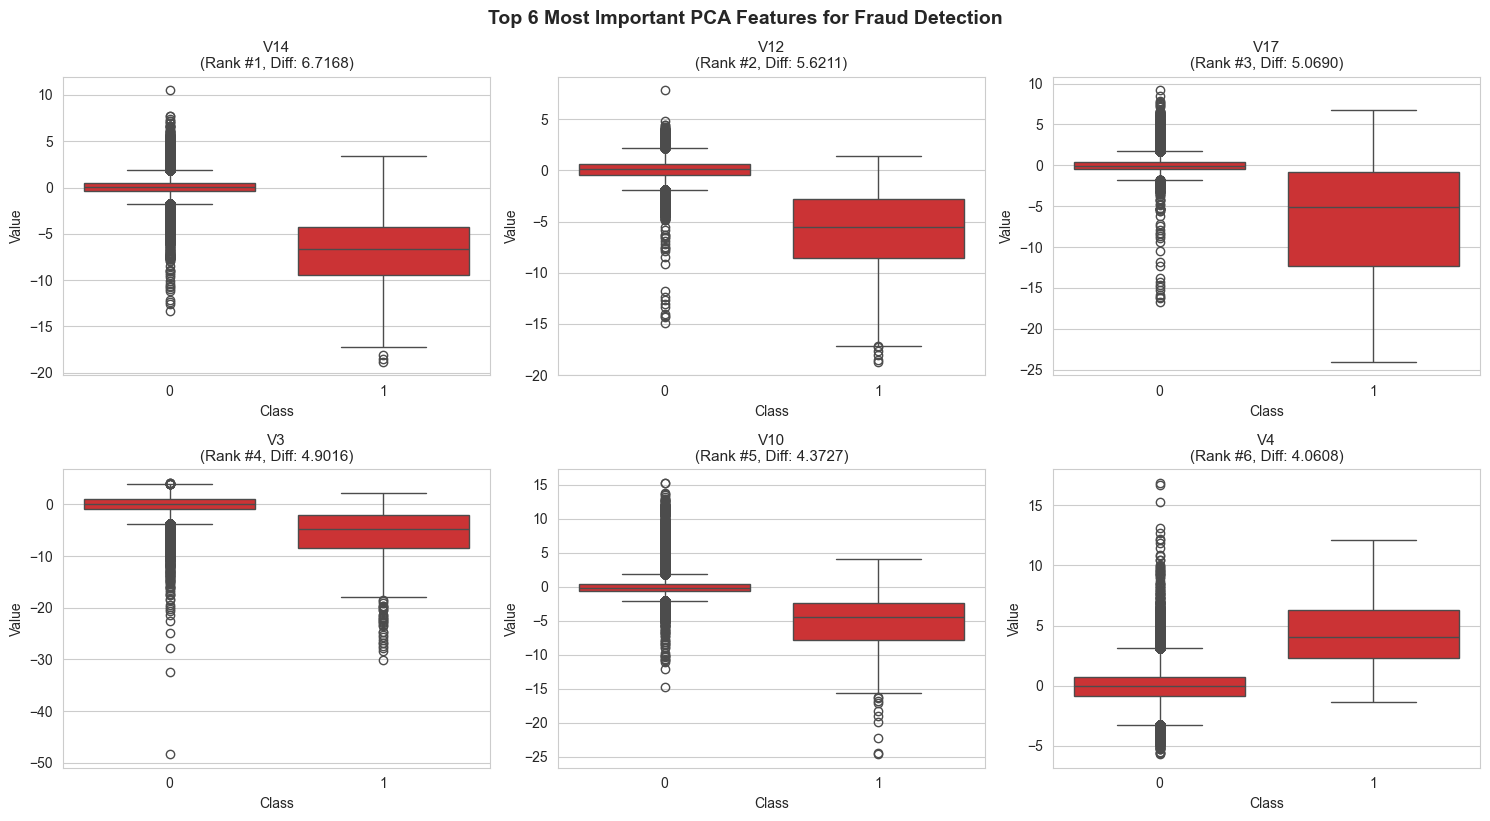

In [30]:
# Set clean style
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("Set1")

# ================================
# 1. CREATE ALL PCA FEATURES PLOT
# ================================
print("Creating comprehensive PCA features analysis...")

# Create the main plot - all 28 PCA features
fig, axes = plt.subplots(7, 4, figsize=(16, 20))
axes = axes.ravel()

# Generate list of PCA features V1-V28
pca_features = [f'V{i}' for i in range(1, 29)]

# Create box plot for each PCA feature
for i, feature in enumerate(pca_features):
    sns.boxplot(data=df_eda, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Clean up the layout
plt.tight_layout()
plt.suptitle('All PCA Features (V1-V28) by Fraud Class\n0 = Normal Transaction, 1 = Fraud', 
             fontsize=14, fontweight='bold', y=0.995)
plt.show()

# ================================
# 2. FIND MOST IMPORTANT FEATURES
# ================================
print("\nAnalyzing feature importance...")

# Calculate median differences for ranking
feature_importance = []

for feature in pca_features:
    normal_median = df_eda[df_eda['Class'] == 0][feature].median()
    fraud_median = df_eda[df_eda['Class'] == 1][feature].median()
    difference = abs(fraud_median - normal_median)
    
    feature_importance.append({
        'Feature': feature,
        'Normal_Median': normal_median,
        'Fraud_Median': fraud_median,
        'Difference': difference
    })

# Convert to DataFrame and sort by difference
importance_df = pd.DataFrame(feature_importance)
importance_df = importance_df.sort_values('Difference', ascending=False)

print("Top 10 Most Important PCA Features (by median difference):")
print("=" * 55)
for i in range(10):
    row = importance_df.iloc[i]
    print(f"{i+1:2}. {row['Feature']:3} - Difference: {row['Difference']:8.4f}")

# ================================
# 3. FOCUS ON TOP 6 FEATURES
# ================================
print("\nCreating detailed view of top 6 features...")

# Get top 6 features
top_6_features = importance_df.head(6)['Feature'].tolist()

# Create focused plot for top features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, feature in enumerate(top_6_features):
    sns.boxplot(data=df_eda, x='Class', y=feature, ax=axes[i])
    
    # Get the difference for this feature
    diff = importance_df[importance_df['Feature'] == feature]['Difference'].iloc[0]
    
    axes[i].set_title(f'{feature}\n(Rank #{i+1}, Diff: {diff:.4f})', fontsize=11)
    axes[i].set_xlabel('Class', fontsize=10)
    axes[i].set_ylabel('Value', fontsize=10)

plt.tight_layout()
plt.suptitle('Top 6 Most Important PCA Features for Fraud Detection', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()



In [31]:
# ================================
# 4. SUMMARY STATISTICS
# ================================
print("\nDataset Summary:")
print("=" * 30)
print(f"Total transactions: {len(df_eda):,}")
print(f"Normal transactions: {(df_eda['Class'] == 0).sum():,}")
print(f"Fraud transactions: {(df_eda['Class'] == 1).sum():,}")
print(f"Fraud rate: {df_eda['Class'].mean():.4%}")

print(f"\nMost important features for fraud detection:")
for i in range(5):
    feature = importance_df.iloc[i]['Feature']
    diff = importance_df.iloc[i]['Difference']
    print(f"  {i+1}. {feature} (difference: {diff:.4f})")

print(f"\n💡 Interpretation:")
print(f"   - Features with larger median differences are better at separating fraud from normal")
print(f"   - The top features show the most distinct patterns between fraud and normal transactions")
print(f"   - Focus on these features when building your fraud detection model")


Dataset Summary:
Total transactions: 170,436
Normal transactions: 170,139
Fraud transactions: 297
Fraud rate: 0.1743%

Most important features for fraud detection:
  1. V14 (difference: 6.7168)
  2. V12 (difference: 5.6211)
  3. V17 (difference: 5.0690)
  4. V3 (difference: 4.9016)
  5. V10 (difference: 4.3727)

💡 Interpretation:
   - Features with larger median differences are better at separating fraud from normal
   - The top features show the most distinct patterns between fraud and normal transactions
   - Focus on these features when building your fraud detection model


<div style="text-align: ; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(10, 196, 242);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
 Do row skewness or kurtosis distinguish Class=1 transactions?
  
</div>
<a id="import-data"></a>


Analyzing Row Statistical Outliers for Fraud Detection...
Calculating row-wise skewness and kurtosis...
✅ Added row_skew and row_kurtosis columns
   Row skewness range: -3.318 to 3.259
   Row kurtosis range: -1.443 to 14.421

Creating KDE distribution plots...


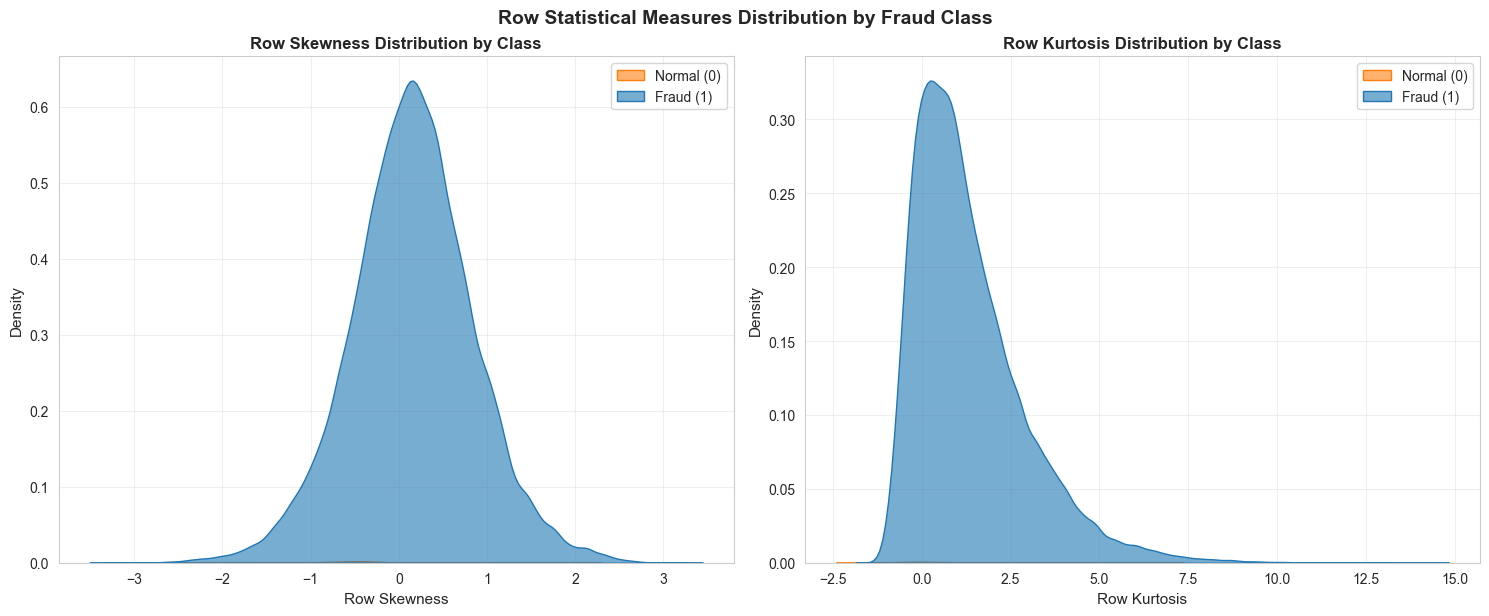

Creating scatter plot: Row Skewness vs Row Kurtosis...


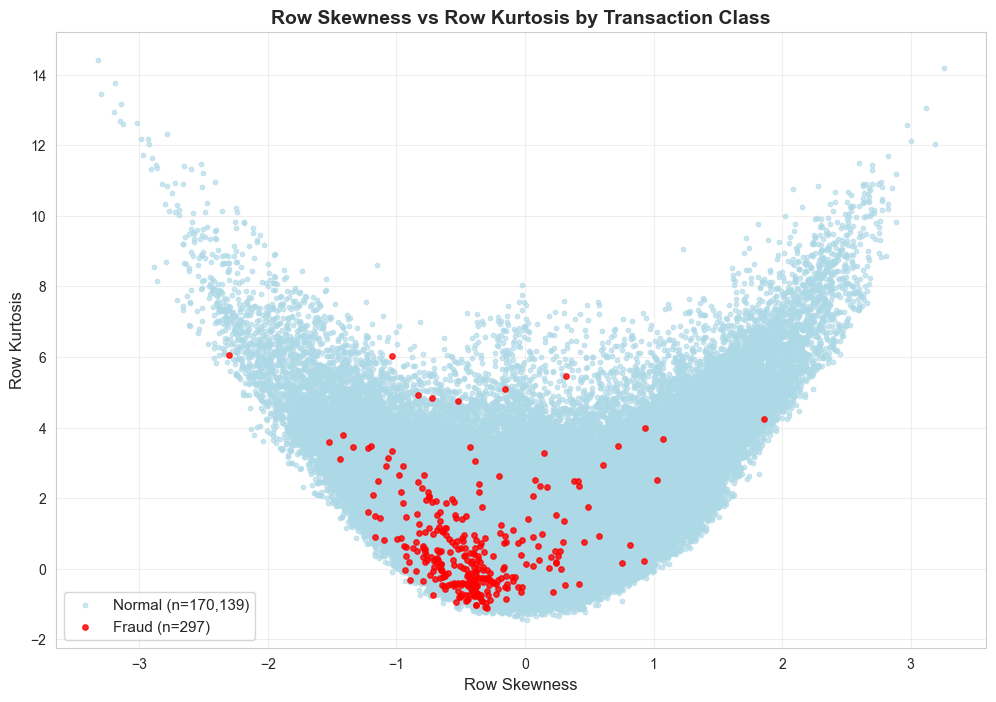

Statistical Analysis:
Row Skewness:
  Normal:    Mean =   0.1499, Std =  0.6987
  Fraud:     Mean =  -0.4192, Std =  0.4544
  Difference:  0.5690

Row Kurtosis:
  Normal:    Mean =   1.3346, Std =  1.5732
  Fraud:     Mean =   0.6555, Std =  1.3550
  Difference:  0.6792

Creating box plots for better comparison...


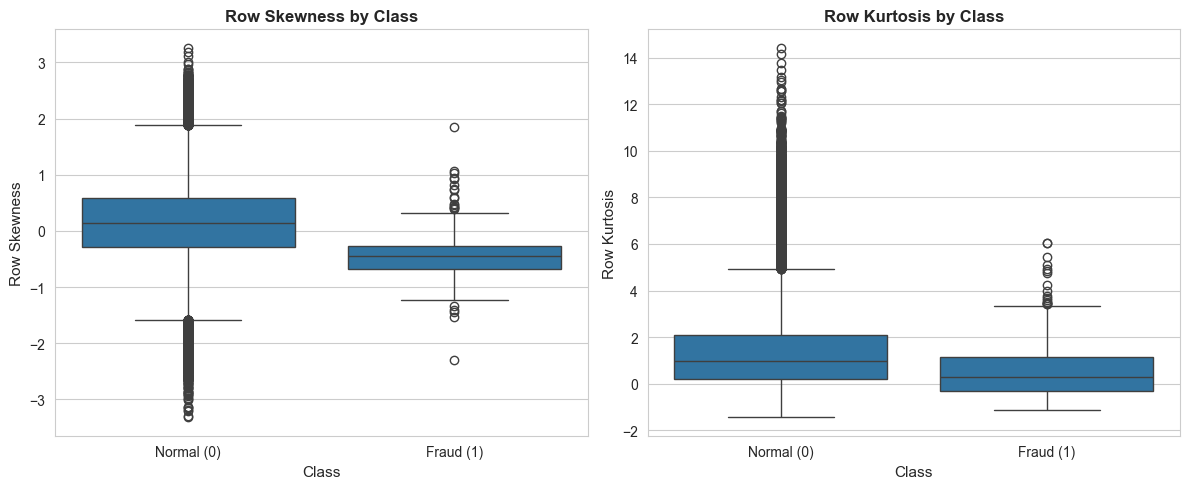

In [32]:
# Set clean style
plt.style.use('default')
sns.set_style("whitegrid")

print("Analyzing Row Statistical Outliers for Fraud Detection...")
print("=" * 60)

# ================================
# 1. CALCULATE ROW STATISTICS
# ================================
print("Calculating row-wise skewness and kurtosis...")

# Get PCA features (V1-V28)
pca_features = [f'V{i}' for i in range(1, 29)]

# Calculate row-wise skewness and kurtosis
df_eda['row_skew'] = df_eda[pca_features].skew(axis=1)
df_eda['row_kurtosis'] = df_eda[pca_features].kurtosis(axis=1)

print(f"✅ Added row_skew and row_kurtosis columns")
print(f"   Row skewness range: {df_eda['row_skew'].min():.3f} to {df_eda['row_skew'].max():.3f}")
print(f"   Row kurtosis range: {df_eda['row_kurtosis'].min():.3f} to {df_eda['row_kurtosis'].max():.3f}")

# ================================
# 2. KDE PLOTS BY CLASS
# ================================
print("\nCreating KDE distribution plots...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# KDE plot for row_skew
sns.kdeplot(data=df_eda, x='row_skew', hue='Class', ax=axes[0], fill=True, alpha=0.6)
axes[0].set_title('Row Skewness Distribution by Class', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Row Skewness', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].legend(['Normal (0)', 'Fraud (1)'])
axes[0].grid(True, alpha=0.3)

# KDE plot for row_kurtosis
sns.kdeplot(data=df_eda, x='row_kurtosis', hue='Class', ax=axes[1], fill=True, alpha=0.6)
axes[1].set_title('Row Kurtosis Distribution by Class', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Row Kurtosis', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].legend(['Normal (0)', 'Fraud (1)'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Row Statistical Measures Distribution by Fraud Class', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

# ================================
# 3. SCATTER PLOT: SKEW vs KURTOSIS
# ================================
print("Creating scatter plot: Row Skewness vs Row Kurtosis...")

plt.figure(figsize=(12, 8))

# Create scatter plot with different colors for each class
fraud_data = df_eda[df_eda['Class'] == 1]
normal_data = df_eda[df_eda['Class'] == 0]

# Plot normal transactions first (background)
plt.scatter(normal_data['row_skew'], normal_data['row_kurtosis'], 
           c='lightblue', alpha=0.6, s=10, label=f'Normal (n={len(normal_data):,})')

# Plot fraud transactions on top (more visible)
plt.scatter(fraud_data['row_skew'], fraud_data['row_kurtosis'], 
           c='red', alpha=0.8, s=15, label=f'Fraud (n={len(fraud_data):,})')

plt.xlabel('Row Skewness', fontsize=12)
plt.ylabel('Row Kurtosis', fontsize=12)
plt.title('Row Skewness vs Row Kurtosis by Transaction Class', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# ================================
# 4. STATISTICAL ANALYSIS
# ================================
print("Statistical Analysis:")
print("=" * 30)

# Calculate statistics for each class
normal_stats = {
    'skew_mean': normal_data['row_skew'].mean(),
    'skew_std': normal_data['row_skew'].std(),
    'kurtosis_mean': normal_data['row_kurtosis'].mean(),
    'kurtosis_std': normal_data['row_kurtosis'].std()
}

fraud_stats = {
    'skew_mean': fraud_data['row_skew'].mean(),
    'skew_std': fraud_data['row_skew'].std(),
    'kurtosis_mean': fraud_data['row_kurtosis'].mean(),
    'kurtosis_std': fraud_data['row_kurtosis'].std()
}

print("Row Skewness:")
print(f"  Normal:    Mean = {normal_stats['skew_mean']:8.4f}, Std = {normal_stats['skew_std']:7.4f}")
print(f"  Fraud:     Mean = {fraud_stats['skew_mean']:8.4f}, Std = {fraud_stats['skew_std']:7.4f}")
print(f"  Difference: {abs(fraud_stats['skew_mean'] - normal_stats['skew_mean']):7.4f}")

print(f"\nRow Kurtosis:")
print(f"  Normal:    Mean = {normal_stats['kurtosis_mean']:8.4f}, Std = {normal_stats['kurtosis_std']:7.4f}")
print(f"  Fraud:     Mean = {fraud_stats['kurtosis_mean']:8.4f}, Std = {fraud_stats['kurtosis_std']:7.4f}")
print(f"  Difference: {abs(fraud_stats['kurtosis_mean'] - normal_stats['kurtosis_mean']):7.4f}")

# ================================
# 5. BOX PLOTS FOR COMPARISON
# ================================
print("\nCreating box plots for better comparison...")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box plot for row_skew
sns.boxplot(data=df_eda, x='Class', y='row_skew', ax=axes[0])
axes[0].set_title('Row Skewness by Class', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=11)
axes[0].set_ylabel('Row Skewness', fontsize=11)
axes[0].set_xticklabels(['Normal (0)', 'Fraud (1)'])

# Box plot for row_kurtosis
sns.boxplot(data=df_eda, x='Class', y='row_kurtosis', ax=axes[1])
axes[1].set_title('Row Kurtosis by Class', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=11)
axes[1].set_ylabel('Row Kurtosis', fontsize=11)
axes[1].set_xticklabels(['Normal (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


In [33]:

# ================================
# 6. KEY FINDINGS SUMMARY
# ================================
print("\n🔍 KEY FINDINGS:")
print("=" * 40)

skew_diff = abs(fraud_stats['skew_mean'] - normal_stats['skew_mean'])
kurtosis_diff = abs(fraud_stats['kurtosis_mean'] - normal_stats['kurtosis_mean'])

if skew_diff > 0.1:
    print(f"✅ Row Skewness shows difference: {skew_diff:.4f}")
    print(f"   → {'Fraud has higher' if fraud_stats['skew_mean'] > normal_stats['skew_mean'] else 'Normal has higher'} average skewness")
else:
    print(f"❌ Row Skewness shows minimal difference: {skew_diff:.4f}")

if kurtosis_diff > 0.1:
    print(f"✅ Row Kurtosis shows difference: {kurtosis_diff:.4f}")
    print(f"   → {'Fraud has higher' if fraud_stats['kurtosis_mean'] > normal_stats['kurtosis_mean'] else 'Normal has higher'} average kurtosis")
else:
    print(f"❌ Row Kurtosis shows minimal difference: {kurtosis_diff:.4f}")

print(f"\n💡 INTERPRETATION:")
if max(skew_diff, kurtosis_diff) > 0.1:
    print(f"   → Row statistical measures CAN help distinguish fraud transactions")
    print(f"   → The {'skewness' if skew_diff > kurtosis_diff else 'kurtosis'} measure is more discriminative")
else:
    print(f"   → Row statistical measures show LIMITED ability to distinguish fraud")
    print(f"   → Consider focusing on individual PCA features instead")

print(f"\n📊 Dataset Summary:")
print(f"   Total transactions: {len(df_eda):,}")
print(f"   Fraud rate: {df_eda['Class'].mean():.4%}")


🔍 KEY FINDINGS:
✅ Row Skewness shows difference: 0.5690
   → Normal has higher average skewness
✅ Row Kurtosis shows difference: 0.6792
   → Normal has higher average kurtosis

💡 INTERPRETATION:
   → Row statistical measures CAN help distinguish fraud transactions
   → The kurtosis measure is more discriminative

📊 Dataset Summary:
   Total transactions: 170,436
   Fraud rate: 0.1743%
